<h1 style="font-size:2.0rem; color:green;"> ESA CCI gap-filling effect study  </h1>  

<div class="alert alert-block alert-success"; background-color:red>  In this notebook, we intend to study ESA CCI gap-filling effect in six pixels containing the snow stations (Ifrane, Midelt, Tichki, M'goun, Tizi Touzna, and Oukaimeden) and trend studies over the period 1982-2018 </div> 

<h1 style="font-size:1.5rem; color:green;"> Load required libraries </h1> 

In [1]:
# autoreload reloads modules automatically before entering the execution of code typed at the IPython prompt
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import netCDF4 as nc
from netCDF4 import Dataset  
import matplotlib.pyplot as plt
import xarray as xr                       
from scipy import stats
import pymannkendall as mk

In [ ]:
# For parallelisation
from dask.distributed import Client
client = Client(n_workers=16, threads_per_worker=2, memory_limit='32GB')
client

<h1 style="font-size:1.5rem; color:green;"> Importing and preparing ESA CCI 
scfg gap-filled and original data</h1>

In [55]:
path1 = r'C:\Data\Snow\SCFG\Satellite\modified_data\V0\extracted_points'

IFR_scfg = pd.read_csv( path1 + r'\scfg_orig\scfg_orig_IFR.csv', sep=",") 
IFR_scfg_interp = pd.read_csv( path1 + r'\scfg_gf\scfg_gf_IFR.csv', sep=",")

MID_scfg = pd.read_csv( path1 + r'\scfg_orig\scfg_orig_MID.csv', sep=",") 
MID_scfg_interp = pd.read_csv( path1 + r'\scfg_gf\scfg_gf_MID.csv', sep=",")

TIC_scfg = pd.read_csv( path1 + r'\scfg_orig\scfg_orig_TIC.csv', sep=",") 
TIC_scfg_interp = pd.read_csv( path1 + r'\scfg_gf\scfg_gf_TIC.csv', sep=",")

MGN_scfg = pd.read_csv( path1 + r'\scfg_orig\scfg_orig_MGN.csv', sep=",") 
MGN_scfg_interp = pd.read_csv( path1 + r'\scfg_gf\scfg_gf_MGN.csv', sep=",")

TIZ_scfg = pd.read_csv( path1 + r'\scfg_orig\scfg_orig_TIZ.csv', sep=",") 
TIZ_scfg_interp = pd.read_csv( path1 + r'\scfg_gf\scfg_gf_TIZ.csv', sep=",")

OUK_scfg = pd.read_csv( path1 + r'\scfg_orig\scfg_orig_OUK.csv', sep=",") 
OUK_scfg_interp = pd.read_csv( path1 + r'\scfg_gf\scfg_gf_OUK.csv', sep=",")

# =======================================================================================================

path2 = r'C:\Data\Snow\SCFG\Satellite\modified_data\V0\extracted_points\cov' 

IFR_cov = pd.read_csv(path2+ '/cov_IFR.csv', sep=",")
MID_cov = pd.read_csv(path2+ '/cov_MID.csv', sep=",")
TIC_cov = pd.read_csv(path2+ '/cov_TIC.csv', sep=",")
MGN_cov = pd.read_csv(path2+ '/cov_MGN.csv', sep=",")
TIZ_cov = pd.read_csv(path2+ '/cov_TIZ.csv', sep=",")
OUK_cov = pd.read_csv(path2+ '/cov_OUK.csv', sep=",")

<div class="alert alert-block alert-success"; background-color:red> We convert the date into a format recognized by the Pandas module </div> 

In [56]:
IFR_scfg['date'] = pd.to_datetime(IFR_scfg['date'], dayfirst=True, yearfirst=True)
IFR_scfg_interp['date'] = pd.to_datetime(IFR_scfg_interp['date'],  dayfirst=True, yearfirst=True)

MID_scfg['date'] = pd.to_datetime(MID_scfg['date'],  dayfirst=True, yearfirst=True)
MID_scfg_interp['date'] = pd.to_datetime(MID_scfg_interp['date'], dayfirst=True, yearfirst=True)

TIC_scfg['date'] = pd.to_datetime(TIC_scfg['date'], dayfirst=True, yearfirst=True)
TIC_scfg_interp['date'] = pd.to_datetime(TIC_scfg_interp['date'],  dayfirst=True, yearfirst=True)

MGN_scfg['date'] = pd.to_datetime(MGN_scfg['date'], dayfirst=True, yearfirst=True)
MGN_scfg_interp['date'] = pd.to_datetime(MGN_scfg_interp['date'], dayfirst=True, yearfirst=True)

TIZ_scfg['date'] = pd.to_datetime(TIZ_scfg['date'],  dayfirst=True, yearfirst=True)
TIZ_scfg_interp['date'] = pd.to_datetime(TIZ_scfg_interp['date'], dayfirst=True, yearfirst=True)

OUK_scfg['date'] = pd.to_datetime(OUK_scfg['date'], dayfirst=True, yearfirst=True)
OUK_scfg_interp['date'] = pd.to_datetime(OUK_scfg_interp['date'], dayfirst=True, yearfirst=True)

In [57]:
IFR_cov['date'] = pd.to_datetime(IFR_cov['date'], yearfirst=True)
MID_cov['date'] = pd.to_datetime(MID_cov['date'], yearfirst=True)
TIC_cov['date'] = pd.to_datetime(TIC_cov['date'], yearfirst=True)
MGN_cov['date'] = pd.to_datetime(MGN_cov['date'], yearfirst=True)
TIZ_cov['date'] = pd.to_datetime(TIZ_cov['date'], yearfirst=True)
OUK_cov['date'] = pd.to_datetime(OUK_cov['date'], yearfirst=True)

C:\Users\Hamid\AppData\Local\Temp\ipykernel_18120\2000588832.py:1: UserWarning: Parsing '31/01/1982' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  IFR_cov['date'] = pd.to_datetime(IFR_cov['date'], yearfirst=True)
C:\Users\Hamid\AppData\Local\Temp\ipykernel_18120\2000588832.py:1: UserWarning: Parsing '28/02/1982' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  IFR_cov['date'] = pd.to_datetime(IFR_cov['date'], yearfirst=True)
C:\Users\Hamid\AppData\Local\Temp\ipykernel_18120\2000588832.py:1: UserWarning: Parsing '31/03/1982' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  IFR_cov['date'] = pd.to_datetime(IFR_cov['date'], yearfirst=True)
C:\Users\Hamid\AppData\Local\Temp\ipykernel_18120\2000588832.py:1: UserWarning: Parsing '30/04/1982' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsi

<div class="alert alert-block alert-success"; background-color:red> We convert the date into a standard format yyyy-mm-dd  </div> 

In [58]:
IFR_scfg['date'] = pd.to_datetime(IFR_scfg['date'], format='%Y-%m-%d')
IFR_scfg_interp['date'] = pd.to_datetime(IFR_scfg_interp['date'], format='%Y-%m-%d')

MID_scfg['date'] = pd.to_datetime(MID_scfg['date'], format='%Y-%m-%d')
MID_scfg_interp['date'] = pd.to_datetime(MID_scfg_interp['date'], format='%Y-%m-%d')
  
TIC_scfg['date'] = pd.to_datetime(TIC_scfg['date'], format='%Y-%m-%d')
TIC_scfg_interp['date'] = pd.to_datetime(TIC_scfg_interp['date'], format='%Y-%m-%d')

MGN_scfg['date'] = pd.to_datetime(MGN_scfg['date'], format='%Y-%m-%d')
MGN_scfg_interp['date'] = pd.to_datetime(MGN_scfg_interp['date'], format='%Y-%m-%d')

TIZ_scfg['date'] = pd.to_datetime(TIZ_scfg['date'], format='%Y-%m-%d')
TIZ_scfg_interp['date'] = pd.to_datetime(TIZ_scfg_interp['date'], format='%Y-%m-%d')
  
OUK_scfg['date'] = pd.to_datetime(OUK_scfg['date'], format='%Y-%m-%d')
OUK_scfg_interp['date'] = pd.to_datetime(OUK_scfg_interp['date'], format='%Y-%m-%d')

In [59]:
IFR_cov['date'] = pd.to_datetime(IFR_cov['date'], format='%Y-%m-%d')
MID_cov['date'] = pd.to_datetime(MID_cov['date'], format='%Y-%m-%d')
TIC_cov['date'] = pd.to_datetime(TIC_cov['date'], format='%Y-%m-%d')
MGN_cov['date'] = pd.to_datetime(MGN_cov['date'], format='%Y-%m-%d')
TIZ_cov['date'] = pd.to_datetime(TIZ_cov['date'], format='%Y-%m-%d')
OUK_cov['date'] = pd.to_datetime(OUK_cov['date'], format='%Y-%m-%d')

<div class="alert alert-block alert-success"; background-color:red> We put the date column as index  </div> 

In [60]:
IFR_scfg.set_index('date', inplace=True)
IFR_scfg_interp.set_index('date', inplace=True)

MID_scfg.set_index('date', inplace=True)
MID_scfg_interp.set_index('date', inplace=True)

TIC_scfg.set_index('date', inplace=True)
TIC_scfg_interp.set_index('date', inplace=True)

MGN_scfg.set_index('date', inplace=True)
MGN_scfg_interp.set_index('date', inplace=True)

TIZ_scfg.set_index('date', inplace=True)
TIZ_scfg_interp.set_index('date', inplace=True)

OUK_scfg.set_index('date', inplace=True)
OUK_scfg_interp.set_index('date', inplace=True)

In [61]:
IFR_cov.set_index('date', inplace=True)
MID_cov.set_index('date', inplace=True)
TIC_cov.set_index('date', inplace=True)
MGN_cov.set_index('date', inplace=True)
TIZ_cov.set_index('date', inplace=True)
OUK_cov.set_index('date', inplace=True)

<div class="alert alert-block alert-success"; background-color:red> Calculation of the monthly average number of days per month covered by the data  </div> 

In [62]:
IFR_cov_mean = IFR_cov.groupby(by=[IFR_cov.index.month]).mean()
MID_cov_mean = MID_cov.groupby(by=[MID_cov.index.month]).mean()
TIC_cov_mean = TIC_cov.groupby(by=[TIC_cov.index.month]).mean()
MGN_cov_mean = MGN_cov.groupby(by=[MGN_cov.index.month]).mean()
TIZ_cov_mean = TIZ_cov.groupby(by=[TIZ_cov.index.month]).mean()
OUK_cov_mean = OUK_cov.groupby(by=[OUK_cov.index.month]).mean()

<div class="alert alert-block alert-success"; background-color:red> We define index for the following dataframes </div> 

In [63]:
IFR_cov_mean.index = [0,1,2,3,4,5,6,7,8,9,10,11]
MID_cov_mean.index = [0,1,2,3,4,5,6,7,8,9,10,11]
TIC_cov_mean.index = [0,1,2,3,4,5,6,7,8,9,10,11]
MGN_cov_mean.index = [0,1,2,3,4,5,6,7,8,9,10,11]
TIZ_cov_mean.index = [0,1,2,3,4,5,6,7,8,9,10,11]
OUK_cov_mean.index = [0,1,2,3,4,5,6,7,8,9,10,11]

<div class="alert alert-block alert-success"; background-color:red> For the gap-fiiled data, we put all specific values which are higher than 100% to nan  </div> 

In [64]:
IFR_scfg.loc[IFR_scfg['scfg'] > 100, 'scfg'] = -9999
MID_scfg.loc[MID_scfg['scfg'] > 100, 'scfg'] = -9999
TIC_scfg.loc[TIC_scfg['scfg'] > 100, 'scfg'] = -9999
MGN_scfg.loc[MGN_scfg['scfg'] > 100, 'scfg'] = -9999
TIZ_scfg.loc[TIZ_scfg['scfg'] > 100, 'scfg'] = -9999
OUK_scfg.loc[OUK_scfg['scfg'] > 100, 'scfg'] = -9999

In [65]:
IFR_scfg_interp = IFR_scfg_interp.fillna(-9999)
MID_scfg_interp = MID_scfg_interp.fillna(-9999)
TIC_scfg_interp = TIC_scfg_interp.fillna(-9999)
MGN_scfg_interp = MGN_scfg_interp.fillna(-9999)
TIZ_scfg_interp = TIZ_scfg_interp.fillna(-9999)
OUK_scfg_interp = OUK_scfg_interp.fillna(-9999)

<div class="alert alert-block alert-success"; background-color:red> For the year 1994, in the ESA CCI data, there is a data problem in the 
    two months September and December, it will be necessary to ignore them by setting them to nan or a code that does not
    represent the values of snow extension.  </div> 

In [66]:
IFR_scfg.loc['1994-10'] = np.nan
IFR_scfg.loc['1994-09'] = np.nan
MID_scfg.loc['1994-10'] = np.nan
MID_scfg.loc['1994-09'] = np.nan
TIC_scfg.loc['1994-10'] = np.nan
TIC_scfg.loc['1994-09'] = np.nan
MGN_scfg.loc['1994-10'] = np.nan
MGN_scfg.loc['1994-09'] = np.nan
TIZ_scfg.loc['1994-10'] = np.nan
TIZ_scfg.loc['1994-09'] = np.nan
OUK_scfg.loc['1994-10'] = np.nan
OUK_scfg.loc['1994-09'] = np.nan

In [67]:
IFR_scfg_interp.loc['1994-10'] = np.nan
IFR_scfg_interp.loc['1994-09'] = np.nan
MID_scfg_interp.loc['1994-10'] = np.nan
MID_scfg_interp.loc['1994-09'] = np.nan
TIC_scfg_interp.loc['1994-10'] = np.nan
TIC_scfg_interp.loc['1994-09'] = np.nan
MGN_scfg_interp.loc['1994-10'] = np.nan
MGN_scfg_interp.loc['1994-09'] = np.nan
TIZ_scfg_interp.loc['1994-10'] = np.nan
TIZ_scfg_interp.loc['1994-09'] = np.nan
OUK_scfg_interp.loc['1994-10'] = np.nan
OUK_scfg_interp.loc['1994-09'] = np.nan

<div class="alert alert-block alert-success"; background-color:red> We run the following two cells, only if we want to view the time series  </div> 

In [16]:
IFR_scfg = IFR_scfg.replace(-9999, np.nan)
MID_scfg = MID_scfg.replace(-9999, np.nan)
TIC_scfg = TIC_scfg.replace(-9999, np.nan)
MGN_scfg = MGN_scfg.replace(-9999, np.nan)
TIZ_scfg = TIZ_scfg.replace(-9999, np.nan)
OUK_scfg = OUK_scfg.replace(-9999, np.nan)

<div class="alert alert-block alert-success"; background-color:red>  An auxiliary function for formatting of the figures  </div> 

In [68]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

<h1 style="font-size:1.5rem; color:green;"> Timeseries vizualisation </h1>

<div class="alert alert-block alert-success"; background-color:red>  Raw time series </div> 

In [18]:
pixels = [IFR_scfg, MID_scfg, TIC_scfg, MGN_scfg, TIZ_scfg, OUK_scfg]
pixels_gf = [IFR_scfg_interp, MID_scfg_interp, TIC_scfg_interp, MGN_scfg_interp, 
                   TIZ_scfg_interp, OUK_scfg_interp]

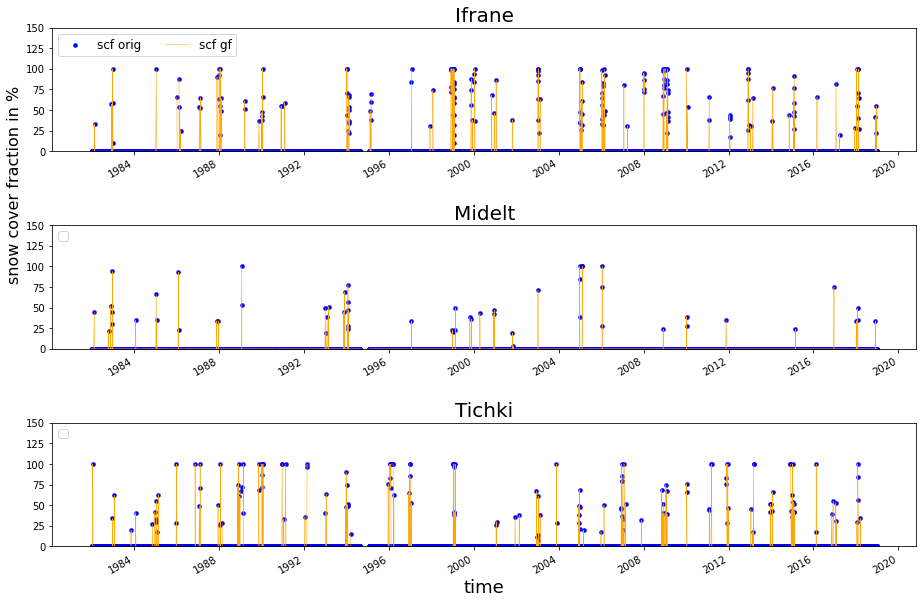

In [25]:
labels = ["Ifrane","Midelt","Tichki"]
fig, axs = plt.subplots(3,1)
plt.subplots_adjust(wspace=0.15,hspace=0.6)

# figure size
set_size(12,8)

for i in range(3):
    pixels[i].reset_index().plot(ax = axs[i], x='date', y='scfg', kind='scatter', color='blue', fontsize=10, linewidth=0.1)   
    pixels_gf[i].plot(ax = axs[i], color='orange', linewidth=0.5)     
    axs[i].set_ylim(0,150)    
    axs[i].set_xlabel("", fontsize=12)     
    axs[i].set_ylabel("", fontsize=12)     
    axs[i].set_title(labels[i], fontsize=20) 
    if i !=0:
        axs[i].legend(labels=[], ncol=3, loc='upper left', fontsize=12)
    else:
        axs[i].legend(labels=['scf orig','scf gf'], ncol=3, loc='upper left', fontsize=12) 

   
axs[2].set_xlabel("time", fontsize=18)
axs[1].set_ylabel("                                        snow cover fraction in %", fontsize=16) 

plt.savefig('timeseries_esa_cci_gf_nongf_IFR_MID_TIC.png')

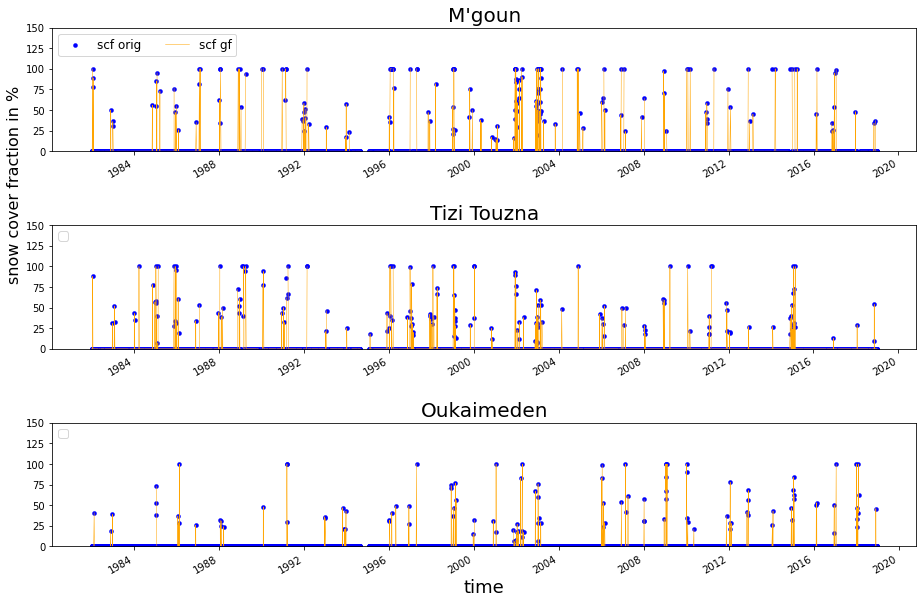

In [26]:
labels = ["M'goun","Tizi Touzna","Oukaimeden"]

fig, axs = plt.subplots(3,1)
plt.subplots_adjust(wspace=0.15,hspace=0.6)

# figure size
set_size(12,8)

for i in range(3):
    pixels[i+3].reset_index().plot(ax = axs[i], x='date', y='scfg', kind='scatter', color='blue', fontsize=10, linewidth=0.1)   
    pixels_gf[i+3].plot(ax = axs[i], color='orange', linewidth=0.5)     
    axs[i].set_ylim(0,150)    
    axs[i].set_xlabel("", fontsize=12)     
    axs[i].set_ylabel("", fontsize=12)     
    axs[i].set_title(labels[i], fontsize=20) 
    if i !=0:
        axs[i].legend(labels=[], ncol=3, loc='upper left', fontsize=12)
    else:
        axs[i].legend(labels=['scf orig','scf gf'], ncol=3, loc='upper left', fontsize=12) 

   
axs[2].set_xlabel("time", fontsize=18)
axs[1].set_ylabel("                                        snow cover fraction in %", fontsize=16) 

plt.savefig('timeseries_esa_cci_gf_nongf_MGN_TIZ_OUK.png')

<h1 style="font-size:1.5rem; color:green;"> Comparison ESA CCI scfg gap-filled product - ESA CCI scfg non gap-filled product   </h1>

<div class="alert alert-block alert-success"; background-color:red> First, we calculate the climatological monthly 
    averages of the number of days with snow over land in the six pixels containing the six stations over the period 1982-2018 on homogeneous periods  </div> 

<h1 style="font-size:1.5rem; color:green;"> Ifrane </h1>

In [100]:
Snow_esa = IFR_scfg['scfg'].where(IFR_scfg['scfg'] > 0).groupby(by=[IFR_scfg.index.month,IFR_scfg.index.year]).count() 
Sum_esa = IFR_scfg['scfg'].where(IFR_scfg['scfg'] >= 0).groupby(by=[IFR_scfg.index.month,IFR_scfg.index.year]).count() 
Nan_esa = IFR_scfg['scfg'].where(IFR_scfg['scfg'] < 0).groupby(by=[IFR_scfg.index.month,IFR_scfg.index.year]).count()

Snow_esa_gf = IFR_scfg_interp['scfg_interp'].where(IFR_scfg_interp['scfg_interp'] > 0).groupby(by=[IFR_scfg_interp.index.month,IFR_scfg_interp.index.year]).count() 
Sum_esa_gf = IFR_scfg_interp['scfg_interp'].where(IFR_scfg_interp['scfg_interp'] >= 0).groupby(by=[IFR_scfg_interp.index.month,IFR_scfg_interp.index.year]).count() 
Nan_esa_gf = IFR_scfg_interp['scfg_interp'].where(IFR_scfg_interp['scfg_interp'] < 0).groupby(by=[IFR_scfg_interp.index.month,IFR_scfg_interp.index.year]).count()

years = [y for y in range(1982,2019)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa[mon][year]>15:
                
                Nan_esa[mon][year] = -9999
                Snow_esa[mon][year] = -9999
                
                Nan_esa_gf[mon][year] = -9999
                Snow_esa_gf[mon][year] = -9999
                
        except KeyError:
            continue 

IFR_disp = pd.DataFrame(columns=['disp'])
L=[]
for i in range(1,13):
    L.append(Snow_esa[i].where(Snow_esa[i] >= 0).count())
    
IFR_disp['disp'] = L
IFR_disp.index = [0,1,2,3,4,5,6,7,8,9,10,11]     
    
Nan_esa = Nan_esa.replace(-9999, np.nan)
Snow_esa = Snow_esa.replace(-9999, np.nan)

Nan_esa_gf = Nan_esa_gf.replace(-9999, np.nan)
Snow_esa_gf = Snow_esa_gf.replace(-9999, np.nan)
                  
IFR_scfg_Sdays =   Snow_esa + Snow_esa*Nan_esa/Sum_esa
IFR_scfg_std = IFR_scfg_Sdays.groupby('date').std().to_list()
IFR_scfg_std = [str(np.around(std, decimals = 2)) for std in IFR_scfg_std]
IFR_scfg_ext = [IFR_scfg_Sdays.groupby('date').mean() - IFR_scfg_Sdays.groupby('date').min(), IFR_scfg_Sdays.groupby('date').max() - IFR_scfg_Sdays.groupby('date').mean()] 
IFR_scfg_Sdays_mean = IFR_scfg_Sdays.groupby('date').mean()
            
IFR_scfg_interp_Sdays =   Snow_esa_gf + Snow_esa_gf*Nan_esa_gf/Sum_esa_gf
IFR_scfg_interp_std = IFR_scfg_interp_Sdays.groupby('date').std().to_list()
IFR_scfg_interp_std = [str(np.around(std, decimals = 2)) for std in IFR_scfg_interp_std]
IFR_scfg_interp_ext = [IFR_scfg_interp_Sdays.groupby('date').mean() - IFR_scfg_interp_Sdays.groupby('date').min(), IFR_scfg_interp_Sdays.groupby('date').max() - IFR_scfg_interp_Sdays.groupby('date').mean()] 
IFR_scfg_interp_Sdays_mean = IFR_scfg_interp_Sdays.groupby('date').mean()            

In [101]:
IFR_scfg_Sdays = IFR_scfg_Sdays.dropna()
IFR_scfg_interp_Sdays = IFR_scfg_interp_Sdays.dropna()

In [102]:
IFR_boxplot = pd.DataFrame(columns=['year', 'month', 'ESA','ESA_gf'])

for m in range(1,13):
    aux = pd.DataFrame(columns=['year', 'month', 'ESA','ESA_gf'])
    aux['year'] = IFR_scfg_Sdays[m].index
    aux['month'] = [m]*len(IFR_scfg_Sdays[m])
    aux['ESA'] = IFR_scfg_Sdays[m].values
    aux['ESA_gf'] = IFR_scfg_interp_Sdays[m].values
    IFR_boxplot = pd.concat([IFR_boxplot, aux], axis=0)
    
IFR_boxplot = IFR_boxplot.drop(labels='year', axis=1)
IFR_boxplot = pd.melt(IFR_boxplot, id_vars="month")
IFR_boxplot.sort_values(["month", "variable"], inplace=True)

IFR_boxplot

,month,variable,value
0,1,ESA,0.0
1,1,ESA,0.0
2,1,ESA,0.0
3,1,ESA,1.823529
4,1,ESA,10.941176
...,...,...,...
683,12,ESA_gf,0.0
684,12,ESA_gf,0.0
685,12,ESA_gf,0.0
686,12,ESA_gf,2.0


Text(0, 0.5, '                     Number of days per month')

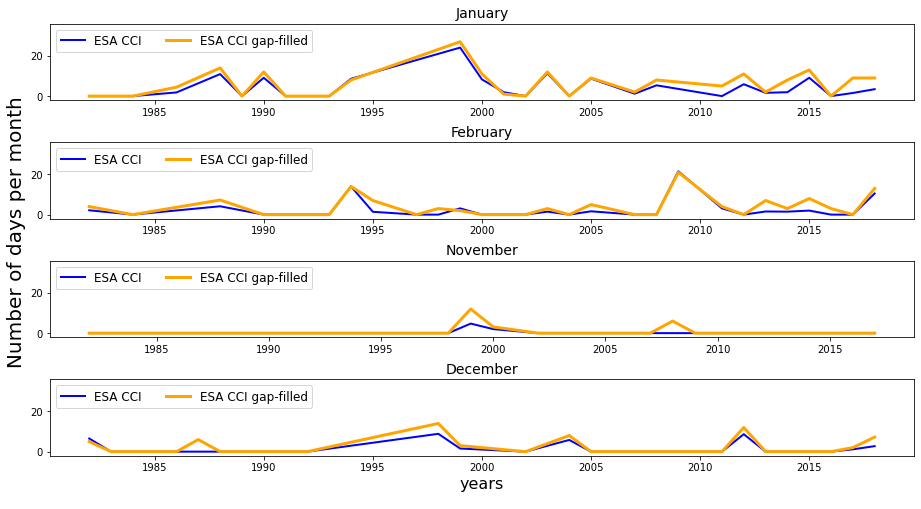

In [103]:
labels = ["January","February","November","December"] 
fig, axs = plt.subplots(4,1)                                                      
plt.subplots_adjust(wspace=0.3,hspace=0.55) 

mons = [1,2,11,12] 
set_size(12,6)
for i in range(4):   
    IFR_scfg_Sdays[mons[i]].plot(ax=axs[i], color='blue', linewidth=2, xlabel="")  
    IFR_scfg_interp_Sdays[mons[i]].plot(ax=axs[i], color='orange', linewidth=3, xlabel="") 
    
    axs[i].legend(labels = ["ESA CCI","ESA CCI gap-filled"], loc='upper left', fontsize = 12, ncol=2) 
    axs[i].set_title(labels[i], fontsize = 14) 
    axs[i].set_ylim(-2,36) 
    
axs[3].set_xlabel("years", fontsize=16)                                       
axs[2].set_ylabel("                     Number of days per month", fontsize=20)
                                                                                                 
#plt.savefig('day_snow_monthly_values_IFR.png')                                                                                                    

<h1 style="font-size:1.5rem; color:green;"> Midelt </h1>

In [104]:
Snow_esa = MID_scfg['scfg'].where(MID_scfg['scfg'] > 0).groupby(by=[MID_scfg.index.month,MID_scfg.index.year]).count() 
Sum_esa = MID_scfg['scfg'].where(MID_scfg['scfg'] >= 0).groupby(by=[MID_scfg.index.month,MID_scfg.index.year]).count() 
Nan_esa = MID_scfg['scfg'].where(MID_scfg['scfg'] < 0).groupby(by=[MID_scfg.index.month,MID_scfg.index.year]).count()

Snow_esa_gf = MID_scfg_interp['scfg_interp'].where(MID_scfg_interp['scfg_interp'] > 0).groupby(by=[MID_scfg_interp.index.month,MID_scfg_interp.index.year]).count() 
Sum_esa_gf = MID_scfg_interp['scfg_interp'].where(MID_scfg_interp['scfg_interp'] >= 0).groupby(by=[MID_scfg_interp.index.month,MID_scfg_interp.index.year]).count() 
Nan_esa_gf = MID_scfg_interp['scfg_interp'].where(MID_scfg_interp['scfg_interp'] < 0).groupby(by=[MID_scfg_interp.index.month,MID_scfg_interp.index.year]).count()


years = [y for y in range(1982,2019)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa[mon][year]>15:
                
                Nan_esa[mon][year] = -9999
                Snow_esa[mon][year] = -9999
                
                Nan_esa_gf[mon][year] = -9999
                Snow_esa_gf[mon][year] = -9999
                
        except KeyError:
            continue 

MID_disp = pd.DataFrame(columns=['disp'])
L=[]
for i in range(1,13):
    L.append(Snow_esa[i].where(Snow_esa[i] >= 0).count())
    
MID_disp['disp'] = L
MID_disp.index = [0,1,2,3,4,5,6,7,8,9,10,11]

Nan_esa = Nan_esa.replace(-9999, np.nan)
Snow_esa = Snow_esa.replace(-9999, np.nan)

Nan_esa_gf = Nan_esa_gf.replace(-9999, np.nan)
Snow_esa_gf = Snow_esa_gf.replace(-9999, np.nan)
           
MID_scfg_Sdays =   Snow_esa + Snow_esa*Nan_esa/Sum_esa
MID_scfg_std = MID_scfg_Sdays.groupby('date').std().to_list()
MID_scfg_std = [str(np.around(std, decimals = 2)) for std in MID_scfg_std]
MID_scfg_ext = [MID_scfg_Sdays.groupby('date').mean() - MID_scfg_Sdays.groupby('date').min(), MID_scfg_Sdays.groupby('date').max() - MID_scfg_Sdays.groupby('date').mean()] 
MID_scfg_Sdays_mean = MID_scfg_Sdays.groupby('date').mean()
            
MID_scfg_interp_Sdays =   Snow_esa_gf + Snow_esa_gf*Nan_esa_gf/Sum_esa_gf
MID_scfg_interp_std = MID_scfg_interp_Sdays.groupby('date').std().to_list()
MID_scfg_interp_std = [str(np.around(std, decimals = 2)) for std in MID_scfg_interp_std]
MID_scfg_interp_ext = [MID_scfg_interp_Sdays.groupby('date').mean() - MID_scfg_interp_Sdays.groupby('date').min(), MID_scfg_interp_Sdays.groupby('date').max() - MID_scfg_interp_Sdays.groupby('date').mean()] 
MID_scfg_interp_Sdays_mean = MID_scfg_interp_Sdays.groupby('date').mean()            

In [105]:
MID_scfg_Sdays = MID_scfg_Sdays.dropna()
MID_scfg_interp_Sdays = MID_scfg_interp_Sdays.dropna()

In [106]:
MID_boxplot = pd.DataFrame(columns=['year', 'month', 'ESA','ESA_gf'])

for m in range(1,13):
    aux = pd.DataFrame(columns=['year', 'month', 'ESA','ESA_gf'])
    aux['year'] = MID_scfg_Sdays[m].index
    aux['month'] = [m]*len(MID_scfg_Sdays[m])
    aux['ESA'] = MID_scfg_Sdays[m].values
    aux['ESA_gf'] = MID_scfg_interp_Sdays[m].values
    MID_boxplot = pd.concat([MID_boxplot, aux], axis=0)
    
MID_boxplot = MID_boxplot.drop(labels='year', axis=1)
MID_boxplot = pd.melt(MID_boxplot, id_vars="month")
MID_boxplot.sort_values(["month", "variable"], inplace=True)

MID_boxplot

,month,variable,value
0,1,ESA,0.0
1,1,ESA,0.0
2,1,ESA,1.631579
3,1,ESA,0.0
4,1,ESA,0.0
...,...,...,...
713,12,ESA_gf,0.0
714,12,ESA_gf,0.0
715,12,ESA_gf,5.0
716,12,ESA_gf,0.0


Text(0, 0.5, '                     Number of days per month')

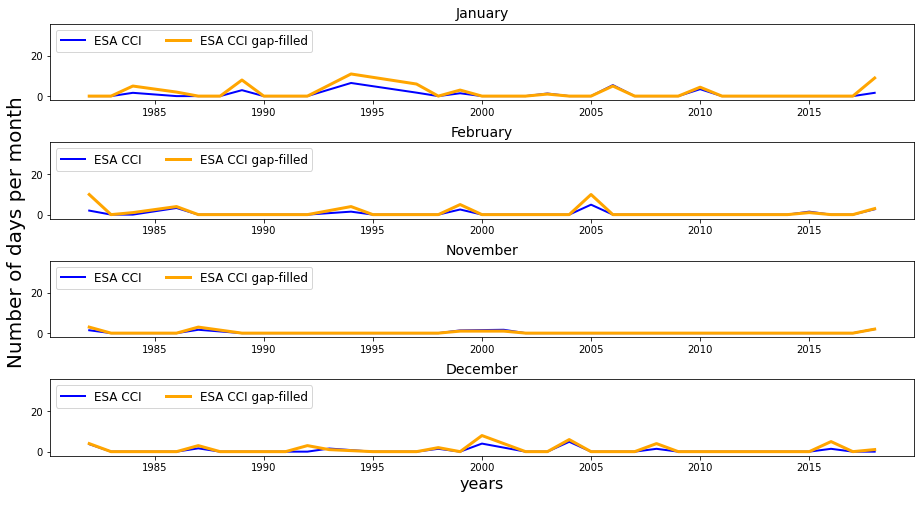

In [107]:
labels = ["January","February","November","December"] 
fig, axs = plt.subplots(4,1)                                                      
plt.subplots_adjust(wspace=0.3,hspace=0.55) 

mons = [1,2,11,12] 
set_size(12,6)
for i in range(4):   
    MID_scfg_Sdays[mons[i]].plot(ax=axs[i], color='blue', linewidth=2, xlabel="")  
    MID_scfg_interp_Sdays[mons[i]].plot(ax=axs[i], color='orange', linewidth=3, xlabel="") 
    
    axs[i].legend(labels = ["ESA CCI","ESA CCI gap-filled"], loc='upper left', fontsize = 12, ncol=2) 
    axs[i].set_title(labels[i], fontsize = 14) 
    axs[i].set_ylim(-2,36) 
    
axs[3].set_xlabel("years", fontsize=16)                                       
axs[2].set_ylabel("                     Number of days per month", fontsize=20)
                                                                                                 
#plt.savefig('day_snow_monthly_values_MID.png') 

<h1 style="font-size:1.5rem; color:green;"> Tichki </h1>

In [108]:
Snow_esa = TIC_scfg['scfg'].where(TIC_scfg['scfg'] > 0).groupby(by=[TIC_scfg.index.month,TIC_scfg.index.year]).count() 
Sum_esa = TIC_scfg['scfg'].where(TIC_scfg['scfg'] >= 0).groupby(by=[TIC_scfg.index.month,TIC_scfg.index.year]).count() 
Nan_esa = TIC_scfg['scfg'].where(TIC_scfg['scfg'] < 0).groupby(by=[TIC_scfg.index.month,TIC_scfg.index.year]).count()

Snow_esa_gf = TIC_scfg_interp['scfg_interp'].where(TIC_scfg_interp['scfg_interp'] > 0).groupby(by=[TIC_scfg_interp.index.month,TIC_scfg_interp.index.year]).count() 
Sum_esa_gf = TIC_scfg_interp['scfg_interp'].where(TIC_scfg_interp['scfg_interp'] >= 0).groupby(by=[TIC_scfg_interp.index.month,TIC_scfg_interp.index.year]).count() 
Nan_esa_gf = TIC_scfg_interp['scfg_interp'].where(TIC_scfg_interp['scfg_interp'] < 0).groupby(by=[TIC_scfg_interp.index.month,TIC_scfg_interp.index.year]).count()


years = [y for y in range(1982,2019)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa[mon][year]>15:
                
                Nan_esa[mon][year] = -9999
                Snow_esa[mon][year] = -9999
                
                Nan_esa_gf[mon][year] = -9999
                Snow_esa_gf[mon][year] = -9999
                
        except KeyError:
            continue 

TIC_disp = pd.DataFrame(columns=['disp'])
L=[]
for i in range(1,13):
    L.append(Snow_esa[i].where(Snow_esa[i] >= 0).count())
    
TIC_disp['disp'] = L
TIC_disp.index = [0,1,2,3,4,5,6,7,8,9,10,11]

Nan_esa = Nan_esa.replace(-9999, np.nan)
Snow_esa = Snow_esa.replace(-9999, np.nan)

Nan_esa_gf = Nan_esa_gf.replace(-9999, np.nan)
Snow_esa_gf = Snow_esa_gf.replace(-9999, np.nan)
           
TIC_scfg_Sdays =   Snow_esa + Snow_esa*Nan_esa/Sum_esa
TIC_scfg_std = TIC_scfg_Sdays.groupby('date').std().to_list()
TIC_scfg_std = [str(np.around(std, decimals = 2)) for std in TIC_scfg_std]
TIC_scfg_ext = [TIC_scfg_Sdays.groupby('date').mean() - TIC_scfg_Sdays.groupby('date').min(), TIC_scfg_Sdays.groupby('date').max() - TIC_scfg_Sdays.groupby('date').mean()] 
TIC_scfg_Sdays_mean = TIC_scfg_Sdays.groupby('date').mean()
            
TIC_scfg_interp_Sdays =   Snow_esa_gf + Snow_esa_gf*Nan_esa_gf/Sum_esa_gf
TIC_scfg_interp_std = TIC_scfg_interp_Sdays.groupby('date').std().to_list()
TIC_scfg_interp_std = [str(np.around(std, decimals = 2)) for std in TIC_scfg_interp_std]
TIC_scfg_interp_ext = [TIC_scfg_interp_Sdays.groupby('date').mean() - TIC_scfg_interp_Sdays.groupby('date').min(), TIC_scfg_interp_Sdays.groupby('date').max() - TIC_scfg_interp_Sdays.groupby('date').mean()] 
TIC_scfg_interp_Sdays_mean = TIC_scfg_interp_Sdays.groupby('date').mean()            

In [109]:
TIC_scfg_Sdays = TIC_scfg_Sdays.dropna()
TIC_scfg_interp_Sdays = TIC_scfg_interp_Sdays.dropna()

In [110]:
TIC_boxplot = pd.DataFrame(columns=['year', 'month', 'ESA','ESA_gf'])

for m in range(1,13):
    aux = pd.DataFrame(columns=['year', 'month', 'ESA','ESA_gf'])
    aux['year'] = TIC_scfg_Sdays[m].index
    aux['month'] = [m]*len(TIC_scfg_Sdays[m])
    aux['ESA'] = TIC_scfg_Sdays[m].values
    aux['ESA_gf'] = TIC_scfg_interp_Sdays[m].values
    TIC_boxplot = pd.concat([TIC_boxplot, aux], axis=0)
    
TIC_boxplot = TIC_boxplot.drop(labels='year', axis=1)
TIC_boxplot = pd.melt(TIC_boxplot, id_vars="month")
TIC_boxplot.sort_values(["month", "variable"], inplace=True)

TIC_boxplot

,month,variable,value
0,1,ESA,2.0
1,1,ESA,1.722222
2,1,ESA,1.722222
3,1,ESA,7.294118
4,1,ESA,0.0
...,...,...,...
513,12,ESA_gf,9.0
514,12,ESA_gf,0.0
515,12,ESA_gf,4.0
516,12,ESA_gf,0.0


Text(0, 0.5, '                     Number of days per month')

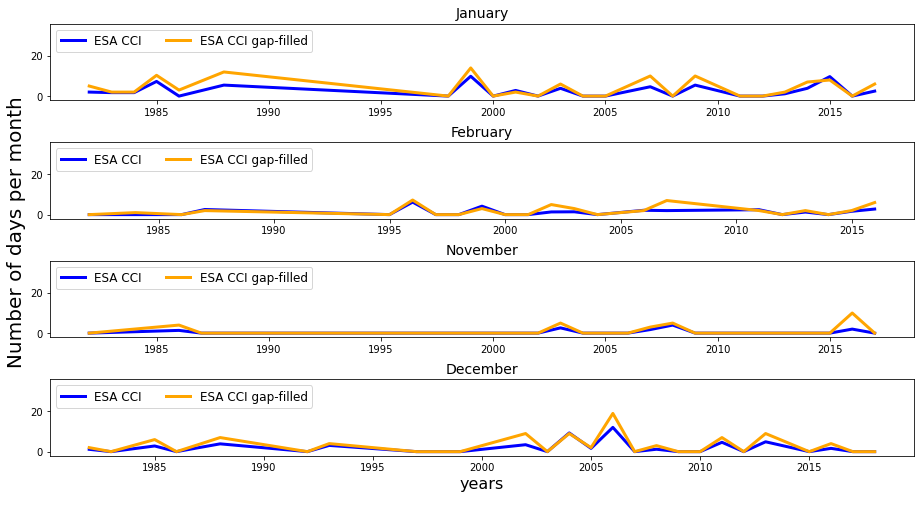

In [111]:
labels = ["January","February","November","December"] 
fig, axs = plt.subplots(4,1)                                                      
plt.subplots_adjust(wspace=0.3,hspace=0.55) 

mons = [1,2,11,12] 
set_size(12,6)
for i in range(4):   
    TIC_scfg_Sdays[mons[i]].plot(ax=axs[i], color='blue', linewidth=3, xlabel="")  
    TIC_scfg_interp_Sdays[mons[i]].plot(ax=axs[i], color='orange', linewidth=3, xlabel="") 
    
    axs[i].legend(labels = ["ESA CCI","ESA CCI gap-filled"], loc='upper left', fontsize = 12, ncol=2) 
    axs[i].set_title(labels[i], fontsize = 14) 
    axs[i].set_ylim(-2,36) 
    
axs[3].set_xlabel("years", fontsize=16)                                       
axs[2].set_ylabel("                     Number of days per month", fontsize=20)
                                                                                                 
#plt.savefig('day_snow_monthly_values_TIC.png') 

<h1 style="font-size:1.5rem; color:green;"> M'goun </h1>

In [112]:
Snow_esa = MGN_scfg['scfg'].where(MGN_scfg['scfg'] > 0).groupby(by=[MGN_scfg.index.month,MGN_scfg.index.year]).count() 
Sum_esa = MGN_scfg['scfg'].where(MGN_scfg['scfg'] >= 0).groupby(by=[MGN_scfg.index.month,MGN_scfg.index.year]).count() 
Nan_esa = MGN_scfg['scfg'].where(MGN_scfg['scfg'] < 0).groupby(by=[MGN_scfg.index.month,MGN_scfg.index.year]).count()

Snow_esa_gf = MGN_scfg_interp['scfg_interp'].where(MGN_scfg_interp['scfg_interp'] > 0).groupby(by=[MGN_scfg_interp.index.month,MGN_scfg_interp.index.year]).count() 
Sum_esa_gf = MGN_scfg_interp['scfg_interp'].where(MGN_scfg_interp['scfg_interp'] >= 0).groupby(by=[MGN_scfg_interp.index.month,MGN_scfg_interp.index.year]).count() 
Nan_esa_gf = MGN_scfg_interp['scfg_interp'].where(MGN_scfg_interp['scfg_interp'] < 0).groupby(by=[MGN_scfg_interp.index.month,MGN_scfg_interp.index.year]).count()


years = [y for y in range(1982,2019)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa[mon][year]>15:
                
                Nan_esa[mon][year] = -9999
                Snow_esa[mon][year] = -9999
                
                Nan_esa_gf[mon][year] = -9999
                Snow_esa_gf[mon][year] = -9999
                
        except KeyError:
            continue 

MGN_disp = pd.DataFrame(columns=['disp'])
L=[]
for i in range(1,13):
    L.append(Snow_esa[i].where(Snow_esa[i] >= 0).count())
    
MGN_disp['disp'] = L
MGN_disp.index = [0,1,2,3,4,5,6,7,8,9,10,11]

Nan_esa = Nan_esa.replace(-9999, np.nan)
Snow_esa = Snow_esa.replace(-9999, np.nan)

Nan_esa_gf = Nan_esa_gf.replace(-9999, np.nan)
Snow_esa_gf = Snow_esa_gf.replace(-9999, np.nan)
           
MGN_scfg_Sdays =   Snow_esa + Snow_esa*Nan_esa/Sum_esa
MGN_scfg_std = MGN_scfg_Sdays.groupby('date').std().to_list()
MGN_scfg_std = [str(np.around(std, decimals = 2)) for std in MGN_scfg_std]
MGN_scfg_ext = [MGN_scfg_Sdays.groupby('date').mean() - MGN_scfg_Sdays.groupby('date').min(), MGN_scfg_Sdays.groupby('date').max() - MGN_scfg_Sdays.groupby('date').mean()] 
MGN_scfg_Sdays_mean = MGN_scfg_Sdays.groupby('date').mean()
            
MGN_scfg_interp_Sdays =   Snow_esa_gf + Snow_esa_gf*Nan_esa_gf/Sum_esa_gf
MGN_scfg_interp_std = MGN_scfg_interp_Sdays.groupby('date').std().to_list()
MGN_scfg_interp_std = [str(np.around(std, decimals = 2)) for std in MGN_scfg_interp_std]
MGN_scfg_interp_ext = [MGN_scfg_interp_Sdays.groupby('date').mean() - MGN_scfg_interp_Sdays.groupby('date').min(), MGN_scfg_interp_Sdays.groupby('date').max() - MGN_scfg_interp_Sdays.groupby('date').mean()] 
MGN_scfg_interp_Sdays_mean = MGN_scfg_interp_Sdays.groupby('date').mean()            

In [113]:
MGN_scfg_Sdays = MGN_scfg_Sdays.dropna()
MGN_scfg_interp_Sdays = MGN_scfg_interp_Sdays.dropna()

In [114]:
MGN_boxplot = pd.DataFrame(columns=['year', 'month', 'ESA','ESA_gf'])

for m in range(1,13):
    aux = pd.DataFrame(columns=['year', 'month', 'ESA','ESA_gf'])
    aux['year'] = MGN_scfg_Sdays[m].index
    aux['month'] = [m]*len(MGN_scfg_Sdays[m])
    aux['ESA'] = MGN_scfg_Sdays[m].values
    aux['ESA_gf'] = MGN_scfg_interp_Sdays[m].values
    MGN_boxplot = pd.concat([MGN_boxplot, aux], axis=0)
    
MGN_boxplot = MGN_boxplot.drop(labels='year', axis=1)
MGN_boxplot = pd.melt(MGN_boxplot, id_vars="month")
MGN_boxplot.sort_values(["month", "variable"], inplace=True)

MGN_boxplot

,month,variable,value
0,1,ESA,5.625
1,1,ESA,0.0
2,1,ESA,0.0
3,1,ESA,0.0
4,1,ESA,4.043478
...,...,...,...
299,12,ESA_gf,7.0
300,12,ESA_gf,13.0
301,12,ESA_gf,0.0
302,12,ESA_gf,1.0


Text(0, 0.5, '                     Number of days per month')

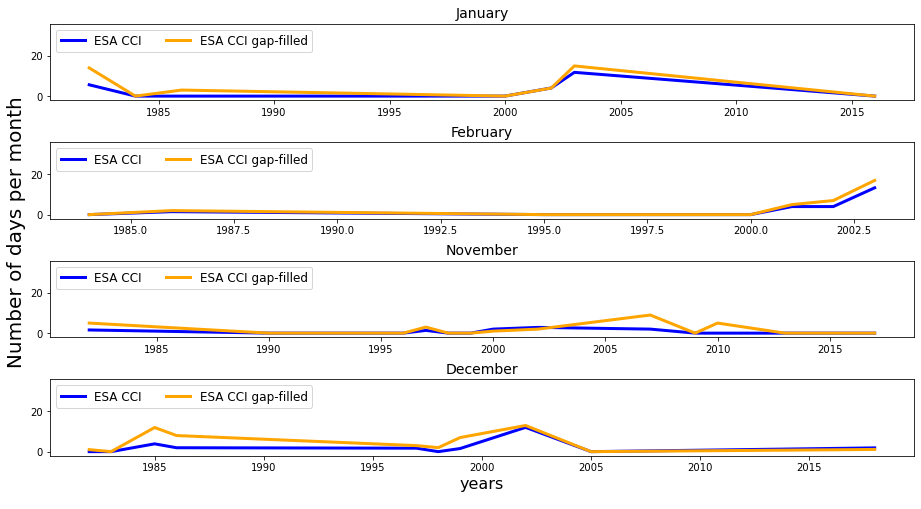

In [115]:
labels = ["January","February","November","December"] 
fig, axs = plt.subplots(4,1)                                                      
plt.subplots_adjust(wspace=0.3,hspace=0.55) 

mons = [1,2,11,12] 
set_size(12,6)
for i in range(4):   
    MGN_scfg_Sdays[mons[i]].plot(ax=axs[i], color='blue', linewidth=3, xlabel="")  
    MGN_scfg_interp_Sdays[mons[i]].plot(ax=axs[i], color='orange', linewidth=3, xlabel="") 
    
    axs[i].legend(labels = ["ESA CCI","ESA CCI gap-filled"], loc='upper left', fontsize = 12, ncol=2) 
    axs[i].set_title(labels[i], fontsize = 14) 
    axs[i].set_ylim(-2,36) 
    
axs[3].set_xlabel("years", fontsize=16)                                       
axs[2].set_ylabel("                     Number of days per month", fontsize=20)
                                                                                                 
#plt.savefig('day_snow_monthly_values_MGN.png') 

<h1 style="font-size:1.5rem; color:green;"> Tizi Touzna </h1>

In [116]:
Snow_esa = TIZ_scfg['scfg'].where(TIZ_scfg['scfg'] > 0).groupby(by=[TIZ_scfg.index.month,TIZ_scfg.index.year]).count() 
Sum_esa = TIZ_scfg['scfg'].where(TIZ_scfg['scfg'] >= 0).groupby(by=[TIZ_scfg.index.month,TIZ_scfg.index.year]).count() 
Nan_esa = TIZ_scfg['scfg'].where(TIZ_scfg['scfg'] < 0).groupby(by=[TIZ_scfg.index.month,TIZ_scfg.index.year]).count()

Snow_esa_gf = TIZ_scfg_interp['scfg_interp'].where(TIZ_scfg_interp['scfg_interp'] > 0).groupby(by=[TIZ_scfg_interp.index.month,TIZ_scfg_interp.index.year]).count() 
Sum_esa_gf = TIZ_scfg_interp['scfg_interp'].where(TIZ_scfg_interp['scfg_interp'] >= 0).groupby(by=[TIZ_scfg_interp.index.month,TIZ_scfg_interp.index.year]).count() 
Nan_esa_gf = TIZ_scfg_interp['scfg_interp'].where(TIZ_scfg_interp['scfg_interp'] < 0).groupby(by=[TIZ_scfg_interp.index.month,TIZ_scfg_interp.index.year]).count()


years = [y for y in range(1982,2019)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa[mon][year]>15:
                
                Nan_esa[mon][year] = -9999
                Snow_esa[mon][year] = -9999
                
                Nan_esa_gf[mon][year] = -9999
                Snow_esa_gf[mon][year] = -9999
                
        except KeyError:
            continue 

TIZ_disp = pd.DataFrame(columns=['disp'])
L=[]
for i in range(1,13):
    L.append(Snow_esa[i].where(Snow_esa[i] >= 0).count())
    
TIZ_disp['disp'] = L
TIZ_disp.index = [0,1,2,3,4,5,6,7,8,9,10,11]

Nan_esa = Nan_esa.replace(-9999, np.nan)
Snow_esa = Snow_esa.replace(-9999, np.nan)

Nan_esa_gf = Nan_esa_gf.replace(-9999, np.nan)
Snow_esa_gf = Snow_esa_gf.replace(-9999, np.nan)
         
TIZ_scfg_Sdays =   Snow_esa + Snow_esa*Nan_esa/Sum_esa
TIZ_scfg_std = TIZ_scfg_Sdays.groupby('date').std().to_list()
TIZ_scfg_std = [str(np.around(std, decimals = 2)) for std in TIZ_scfg_std]
TIZ_scfg_ext = [TIZ_scfg_Sdays.groupby('date').mean() - TIZ_scfg_Sdays.groupby('date').min(), TIZ_scfg_Sdays.groupby('date').max() - TIZ_scfg_Sdays.groupby('date').mean()] 
TIZ_scfg_Sdays_mean = TIZ_scfg_Sdays.groupby('date').mean()
            
TIZ_scfg_interp_Sdays =   Snow_esa_gf + Snow_esa_gf*Nan_esa_gf/Sum_esa_gf
TIZ_scfg_interp_std = TIZ_scfg_interp_Sdays.groupby('date').std().to_list()
TIZ_scfg_interp_std = [str(np.around(std, decimals = 2)) for std in TIZ_scfg_interp_std]
TIZ_scfg_interp_ext = [TIZ_scfg_interp_Sdays.groupby('date').mean() - TIZ_scfg_interp_Sdays.groupby('date').min(), TIZ_scfg_interp_Sdays.groupby('date').max() - TIZ_scfg_interp_Sdays.groupby('date').mean()] 
TIZ_scfg_interp_Sdays_mean = TIZ_scfg_interp_Sdays.groupby('date').mean()            

In [117]:
TIZ_scfg_Sdays = TIZ_scfg_Sdays.dropna()
TIZ_scfg_interp_Sdays = TIZ_scfg_interp_Sdays.dropna()

In [118]:
TIZ_boxplot = pd.DataFrame(columns=['year', 'month', 'ESA','ESA_gf'])

for m in range(1,13):
    aux = pd.DataFrame(columns=['year', 'month', 'ESA','ESA_gf'])
    aux['year'] = TIZ_scfg_Sdays[m].index
    aux['month'] = [m]*len(TIZ_scfg_Sdays[m])
    aux['ESA'] = TIZ_scfg_Sdays[m].values
    aux['ESA_gf'] = TIZ_scfg_interp_Sdays[m].values
    TIZ_boxplot = pd.concat([TIZ_boxplot, aux], axis=0)
    
TIZ_boxplot = TIZ_boxplot.drop(labels='year', axis=1)
TIZ_boxplot = pd.melt(TIZ_boxplot, id_vars="month")
TIZ_boxplot.sort_values(["month", "variable"], inplace=True)

TIZ_boxplot

,month,variable,value
0,1,ESA,3.444444
1,1,ESA,1.192308
2,1,ESA,3.444444
3,1,ESA,3.647059
4,1,ESA,7.75
...,...,...,...
397,12,ESA_gf,9.0
398,12,ESA_gf,1.0
399,12,ESA_gf,0.0
400,12,ESA_gf,0.0


Text(0, 0.5, '                     Number of days per month')

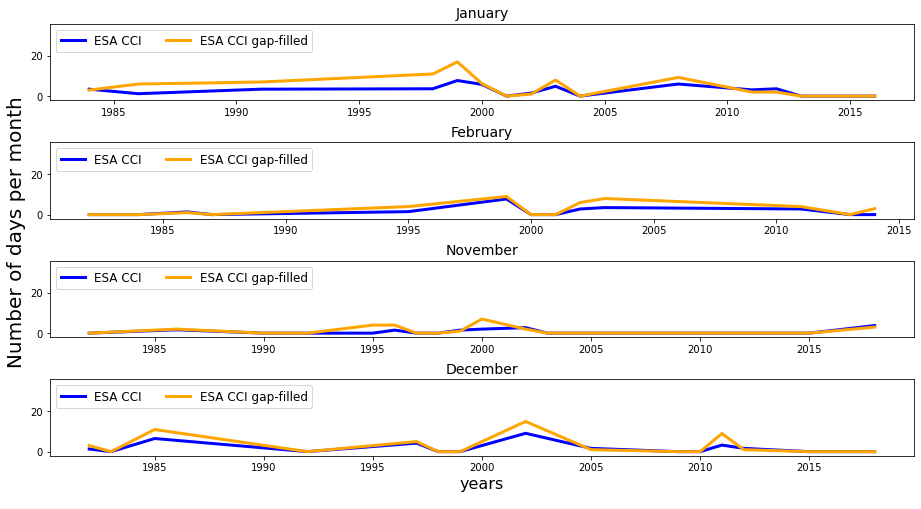

In [119]:
labels = ["January","February","November","December"] 
fig, axs = plt.subplots(4,1)                                                      
plt.subplots_adjust(wspace=0.3,hspace=0.55) 

mons = [1,2,11,12] 
set_size(12,6)
for i in range(4):   
    TIZ_scfg_Sdays[mons[i]].plot(ax=axs[i], color='blue', linewidth=3, xlabel="")  
    TIZ_scfg_interp_Sdays[mons[i]].plot(ax=axs[i], color='orange', linewidth=3, xlabel="") 
    
    axs[i].legend(labels = ["ESA CCI","ESA CCI gap-filled"], loc='upper left', fontsize = 12, ncol=2) 
    axs[i].set_title(labels[i], fontsize = 14) 
    axs[i].set_ylim(-2,36) 
    
axs[3].set_xlabel("years", fontsize=16)                                       
axs[2].set_ylabel("                     Number of days per month", fontsize=20)
                                                                                                 
#plt.savefig('day_snow_monthly_values_TIZ.png') 

<h1 style="font-size:1.5rem; color:green;"> Oukaimeden </h1>

In [120]:
Snow_esa = OUK_scfg['scfg'].where(OUK_scfg['scfg'] > 0).groupby(by=[OUK_scfg.index.month,OUK_scfg.index.year]).count() 
Sum_esa = OUK_scfg['scfg'].where(OUK_scfg['scfg'] >= 0).groupby(by=[OUK_scfg.index.month,OUK_scfg.index.year]).count() 
Nan_esa = OUK_scfg['scfg'].where(OUK_scfg['scfg'] < 0).groupby(by=[OUK_scfg.index.month,OUK_scfg.index.year]).count()

Snow_esa_gf = OUK_scfg_interp['scfg_interp'].where(OUK_scfg_interp['scfg_interp'] > 0).groupby(by=[OUK_scfg_interp.index.month,OUK_scfg_interp.index.year]).count() 
Sum_esa_gf = OUK_scfg_interp['scfg_interp'].where(OUK_scfg_interp['scfg_interp'] >= 0).groupby(by=[OUK_scfg_interp.index.month,OUK_scfg_interp.index.year]).count() 
Nan_esa_gf = OUK_scfg_interp['scfg_interp'].where(OUK_scfg_interp['scfg_interp'] < 0).groupby(by=[OUK_scfg_interp.index.month,OUK_scfg_interp.index.year]).count()


years = [y for y in range(1982,2019)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa[mon][year]>15:
                
                Nan_esa[mon][year] = -9999
                Snow_esa[mon][year] = -9999
                
                Nan_esa_gf[mon][year] = -9999
                Snow_esa_gf[mon][year] = -9999
                
        except KeyError:
            continue 

OUK_disp = pd.DataFrame(columns=['disp'])
L=[]
for i in range(1,13):
    L.append(Snow_esa[i].where(Snow_esa[i] >= 0).count())
    
OUK_disp['disp'] = L
OUK_disp.index = [0,1,2,3,4,5,6,7,8,9,10,11]

Nan_esa = Nan_esa.replace(-9999, np.nan)
Snow_esa = Snow_esa.replace(-9999, np.nan)

Nan_esa_gf = Nan_esa_gf.replace(-9999, np.nan)
Snow_esa_gf = Snow_esa_gf.replace(-9999, np.nan)
         
OUK_scfg_Sdays =   Snow_esa + Snow_esa*Nan_esa/Sum_esa
OUK_scfg_std = OUK_scfg_Sdays.groupby('date').std().to_list()
OUK_scfg_std = [str(np.around(std, decimals = 2)) for std in OUK_scfg_std]
OUK_scfg_ext = [OUK_scfg_Sdays.groupby('date').mean() - OUK_scfg_Sdays.groupby('date').min(), OUK_scfg_Sdays.groupby('date').max() - OUK_scfg_Sdays.groupby('date').mean()] 
OUK_scfg_Sdays_mean = OUK_scfg_Sdays.groupby('date').mean()
            
OUK_scfg_interp_Sdays =   Snow_esa_gf + Snow_esa_gf*Nan_esa_gf/Sum_esa_gf
OUK_scfg_interp_std = OUK_scfg_interp_Sdays.groupby('date').std().to_list()
OUK_scfg_interp_std = [str(np.around(std, decimals = 2)) for std in OUK_scfg_interp_std]
OUK_scfg_interp_ext = [OUK_scfg_interp_Sdays.groupby('date').mean() - OUK_scfg_interp_Sdays.groupby('date').min(), OUK_scfg_interp_Sdays.groupby('date').max() - OUK_scfg_interp_Sdays.groupby('date').mean()] 
OUK_scfg_interp_Sdays_mean = OUK_scfg_interp_Sdays.groupby('date').mean()            

In [121]:
OUK_scfg_Sdays = OUK_scfg_Sdays.dropna()
OUK_scfg_interp_Sdays = OUK_scfg_interp_Sdays.dropna()

In [122]:
OUK_boxplot = pd.DataFrame(columns=['year', 'month', 'ESA','ESA_gf'])

mons = [1,2,3,4,5,6,7,11,12]
for m in mons:  
    aux = pd.DataFrame(columns=['year', 'month', 'ESA','ESA_gf'])
    aux['year'] = OUK_scfg_Sdays[m].index
    aux['month'] = [m]*len(OUK_scfg_Sdays[m])
    aux['ESA'] = OUK_scfg_Sdays[m].values
    aux['ESA_gf'] = OUK_scfg_interp_Sdays[m].values
    OUK_boxplot = pd.concat([OUK_boxplot, aux], axis=0)
    
OUK_boxplot = OUK_boxplot.drop(labels='year', axis=1)
OUK_boxplot = pd.melt(OUK_boxplot, id_vars="month")
OUK_boxplot.sort_values(["month", "variable"], inplace=True)

OUK_boxplot

,month,variable,value
0,1,ESA,0.0
1,1,ESA,0.0
2,1,ESA,0.0
3,1,ESA,0.0
4,1,ESA,0.0
...,...,...,...
385,12,ESA_gf,0.0
386,12,ESA_gf,9.0
387,12,ESA_gf,0.0
388,12,ESA_gf,0.0


Text(0, 0.5, '                     Number of days per month')

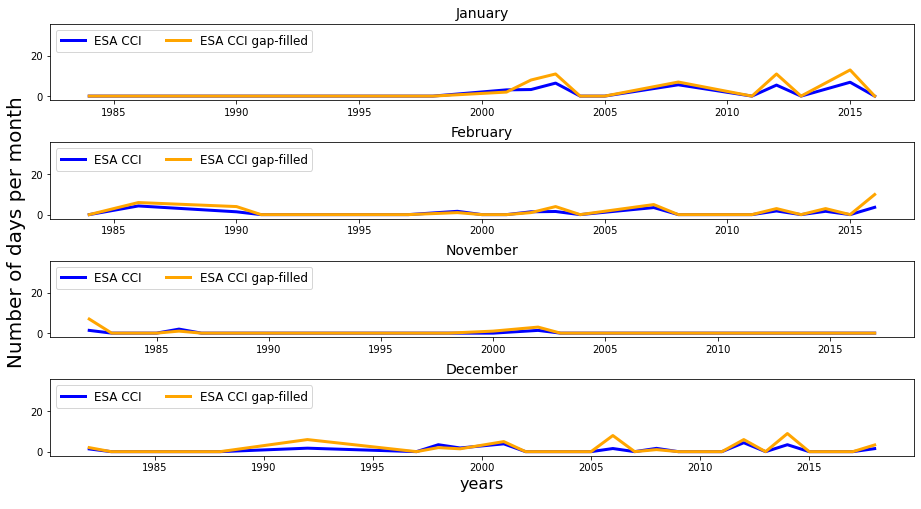

In [123]:
labels = ["January","February","November","December"] 
fig, axs = plt.subplots(4,1)                                                      
plt.subplots_adjust(wspace=0.3,hspace=0.55) 

mons = [1,2,11,12] 
set_size(12,6)
for i in range(4):   
    OUK_scfg_Sdays[mons[i]].plot(ax=axs[i], color='blue', linewidth=3, xlabel="")  
    OUK_scfg_interp_Sdays[mons[i]].plot(ax=axs[i], color='orange', linewidth=3, xlabel="") 
    
    axs[i].legend(labels = ["ESA CCI","ESA CCI gap-filled"], loc='upper left', fontsize = 12, ncol=2) 
    axs[i].set_title(labels[i], fontsize = 14) 
    axs[i].set_ylim(-2,36) 
    
axs[3].set_xlabel("years", fontsize=16)                                       
axs[2].set_ylabel("                     Number of days per month", fontsize=20)
                                                                                                 
#plt.savefig('day_snow_monthly_values_OUK.png') 

<div class="alert alert-block alert-success"; background-color:red>  Now we prepare the dataframes to be plotted  </div> 

In [124]:
IFR_scfg_ext = [IFR_scfg_ext[0][[1,2,3,4,5,6,7,8,9,10,11,12]], IFR_scfg_ext[1][[1,2,3,4,5,6,7,8,9,10,11,12]]]
MID_scfg_ext = [MID_scfg_ext[0][[1,2,3,4,5,6,7,8,9,10,11,12]], MID_scfg_ext[1][[1,2,3,4,5,6,7,8,9,10,11,12]]]
TIC_scfg_ext = [TIC_scfg_ext[0][[1,2,3,4,5,6,7,8,9,10,11,12]], TIC_scfg_ext[1][[1,2,3,4,5,6,7,8,9,10,11,12]]]
MGN_scfg_ext = [MGN_scfg_ext[0][[1,2,3,4,5,6,7,8,9,10,11,12]], MGN_scfg_ext[1][[1,2,3,4,5,6,7,8,9,10,11,12]]]
TIZ_scfg_ext = [TIZ_scfg_ext[0][[1,2,3,4,5,6,7,8,9,10,11,12]], TIZ_scfg_ext[1][[1,2,3,4,5,6,7,8,9,10,11,12]]]
OUK_scfg_ext = [OUK_scfg_ext[0][[1,2,3,4,5,6,7,8,9,10,11,12]], OUK_scfg_ext[1][[1,2,3,4,5,6,7,8,9,10,11,12]]]

In [125]:
IFR_scfg_interp_ext = [IFR_scfg_interp_ext[0][[1,2,3,4,5,6,7,8,9,10,11,12]], IFR_scfg_interp_ext[1][[1,2,3,4,5,6,7,8,9,10,11,12]]]
MID_scfg_interp_ext = [MID_scfg_interp_ext[0][[1,2,3,4,5,6,7,8,9,10,11,12]], MID_scfg_interp_ext[1][[1,2,3,4,5,6,7,8,9,10,11,12]]]
TIC_scfg_interp_ext = [TIC_scfg_interp_ext[0][[1,2,3,4,5,6,7,8,9,10,11,12]], TIC_scfg_interp_ext[1][[1,2,3,4,5,6,7,8,9,10,11,12]]]
MGN_scfg_interp_ext = [MGN_scfg_interp_ext[0][[1,2,3,4,5,6,7,8,9,10,11,12]], MGN_scfg_interp_ext[1][[1,2,3,4,5,6,7,8,9,10,11,12]]]
TIZ_scfg_interp_ext = [TIZ_scfg_interp_ext[0][[1,2,3,4,5,6,7,8,9,10,11,12]], TIZ_scfg_interp_ext[1][[1,2,3,4,5,6,7,8,9,10,11,12]]]
OUK_scfg_interp_ext = [OUK_scfg_interp_ext[0][[1,2,3,4,5,6,7,8,9,10,11,12]], OUK_scfg_interp_ext[1][[1,2,3,4,5,6,7,8,9,10,11,12]]]

In [126]:
ifr = pd.concat([IFR_scfg_Sdays_mean, IFR_scfg_interp_Sdays_mean], axis=1)
mid = pd.concat([MID_scfg_Sdays_mean, MID_scfg_interp_Sdays_mean], axis=1)
tic = pd.concat([TIC_scfg_Sdays_mean, TIC_scfg_interp_Sdays_mean], axis=1)
mgn = pd.concat([ MGN_scfg_Sdays_mean, MGN_scfg_interp_Sdays_mean], axis=1)
tiz = pd.concat([ TIZ_scfg_Sdays_mean, TIZ_scfg_interp_Sdays_mean], axis=1)
ouk = pd.concat([ OUK_scfg_Sdays_mean, OUK_scfg_interp_Sdays_mean], axis=1)

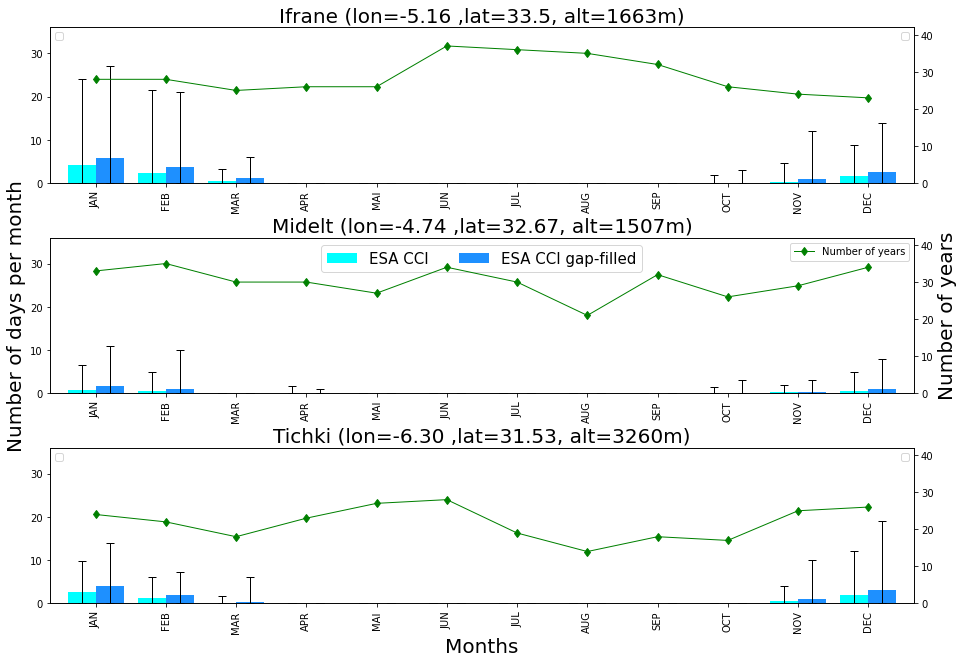

In [156]:
fig, axs=plt.subplots(3,1) 
# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=0.2,hspace=0.35)

# We fix the size of figure
set_size(12,8)     

, female, width=0.4
c1 = 'cyan'  
c2 = 'dodgerblue'
c3 = 'green'

#=============================== Ifrane ===========================================
ax = axs[0]
ifr.plot.bar(yerr=[IFR_scfg_ext,IFR_scfg_interp_ext], ax=ax, width=0.8, color=[c1, c2], grid=False, capsize=4, error_kw=dict(ecolor='black',elinewidth=1))
ax.set_xlabel("", fontsize=10) 
ax.legend(labels = [], loc='upper left', fontsize = 10, ncol=3)
ax.set_title("Ifrane (lon=-5.16 ,lat=33.5, alt=1663m)", fontsize = 20)
ax.set_ylim(0,36)


ax2 = ax.twinx()

IFR_disp.plot.line(ax=ax2, color=c3, marker='d', linewidth=1)
ax2.legend(labels = [], loc='upper right', fontsize = 10, ncol=2)  
ax2.set_ylim(0,42)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=["JAN","FEB","MAR","APR","MAI","JUN","JUL","AUG","SEP","OCT","NOV","DEC"], fontsize=8)

#=============================== Midelt ===========================================
ax = axs[1]
mid.plot.bar(yerr=[MID_scfg_ext,MID_scfg_interp_ext], ax=ax, width=0.8, color=[c1, c2], grid=False,  capsize=4,error_kw=dict(ecolor='black',elinewidth=1))
ax.set_xlabel("", fontsize=10) 
ax.set_ylabel("Number of days per month", fontsize=20)
ax.legend(labels = ["ESA CCI","ESA CCI gap-filled"], loc='upper center', fontsize = 15, ncol=3)
ax.set_title("Midelt (lon=-4.74 ,lat=32.67, alt=1507m)", fontsize = 20)
ax.set_ylim(0,36)


ax2 = ax.twinx()

MID_disp.plot.line(ax=ax2, color=c3, marker='d', linewidth=1)
ax2.legend(labels = ["Number of years"], loc='upper right', fontsize = 10, ncol=2)
ax2.set_ylabel("Number of years", fontsize=20)
ax2.set_ylim(0,42)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=["JAN","FEB","MAR","APR","MAI","JUN","JUL","AUG","SEP","OCT","NOV","DEC"], fontsize=8)


#=============================== Tichki ===========================================
ax = axs[2]
tic.plot.bar(yerr=[TIC_scfg_ext,TIC_scfg_interp_ext], ax=ax, width=0.8, color=[c1, c2], grid=False,  capsize=4,error_kw=dict(ecolor='black',elinewidth=1))
ax.set_xlabel("Months", fontsize=20) 
ax.set_ylabel("", fontsize=20)
ax.legend(labels = [], loc='upper left', fontsize = 10, ncol=3)
ax.set_title("Tichki (lon=-6.30 ,lat=31.53, alt=3260m)", fontsize = 20)
ax.set_ylim(0,36)

ax2 = ax.twinx()

TIC_disp.plot.line(ax=ax2, color=c3, marker='d', linewidth=1)
ax2.legend(labels = [], loc='upper right', fontsize = 10, ncol=2)
ax2.set_ylim(0,42)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=["JAN","FEB","MAR","APR","MAI","JUN","JUL","AUG","SEP","OCT","NOV","DEC"], fontsize=8)

plt.savefig('comparison_esa_cci_gf_nongf_year_disp_IFR_MID_TIC.png')  

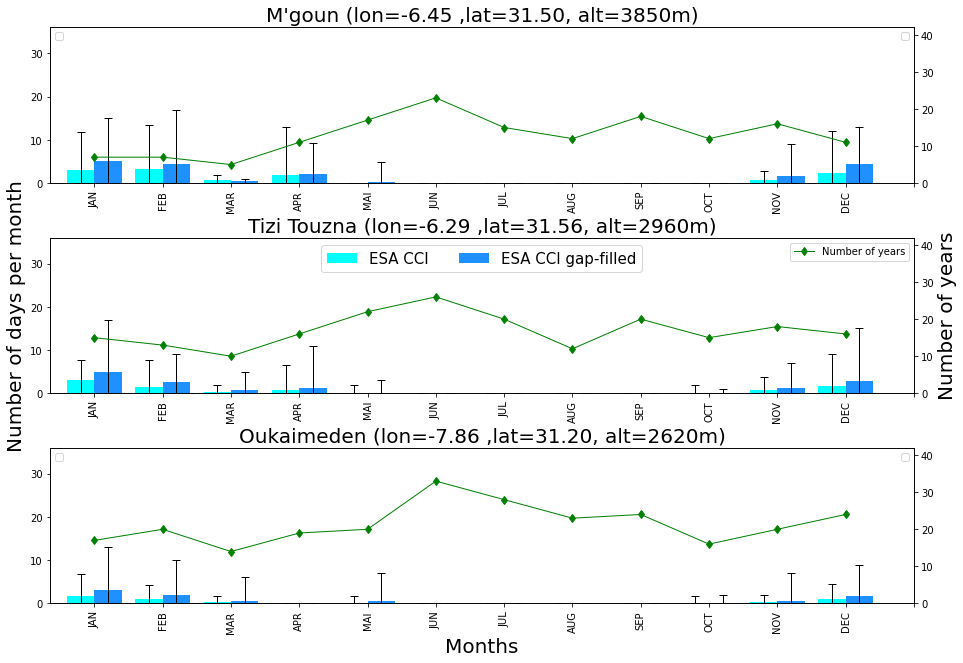

In [157]:
fig, axs=plt.subplots(3,1) 
# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=0.2,hspace=0.35)

# We fix the size of figure
set_size(12,8)     

, female, width=0.4
c1 = 'cyan'  
c2 = 'dodgerblue'
c3 = 'green'

#=============================== M'goun ===========================================

ax = axs[0]
mgn.plot.bar(yerr=[MGN_scfg_ext,MGN_scfg_interp_ext], ax=ax, width=0.8, color=[c1, c2], grid=False, capsize=4, error_kw=dict(ecolor='black',elinewidth=1))
ax.set_xlabel("", fontsize=10) 
ax.legend(labels = [], loc='upper left', fontsize = 10, ncol=3)
ax.set_title("M'goun (lon=-6.45 ,lat=31.50, alt=3850m)", fontsize = 20)
ax.set_ylim(0,36)


ax2 = ax.twinx()

MGN_disp.plot.line(ax=ax2, color=c3, marker='d', linewidth=1)
ax2.legend(labels = [], loc='upper right', fontsize = 10, ncol=2)  
ax2.set_ylim(0,42)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12], labels=["JAN","FEB","MAR","APR","MAI","JUN","JUL","AUG","SEP","OCT","NOV","DEC",""], fontsize=8)
#=============================== Tizi Touzna ===========================================

ax = axs[1]
tiz.plot.bar(yerr=[TIZ_scfg_ext,TIZ_scfg_interp_ext], ax=ax, width=0.8, color=[c1, c2], grid=False,  capsize=4,error_kw=dict(ecolor='black',elinewidth=1))
ax.set_xlabel("", fontsize=10) 
ax.set_ylabel("Number of days per month", fontsize=20)
ax.legend(labels = ["ESA CCI","ESA CCI gap-filled"], loc='upper center', fontsize = 15, ncol=3)
ax.set_title("Tizi Touzna (lon=-6.29 ,lat=31.56, alt=2960m)", fontsize = 20)
ax.set_ylim(0,36)


ax2 = ax.twinx()

TIZ_disp.plot.line(ax=ax2, color=c3, marker='d', linewidth=1)
ax2.legend(labels = ["Number of years"], loc='upper right', fontsize = 10, ncol=2)
ax2.set_ylabel("Number of years", fontsize=20)
ax2.set_ylim(0,42)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12], labels=["JAN","FEB","MAR","APR","MAI","JUN","JUL","AUG","SEP","OCT","NOV","DEC",""], fontsize=8)
#=============================== Oukaimeden ===========================================

ax = axs[2]
ouk.plot.bar(yerr=[OUK_scfg_ext,OUK_scfg_interp_ext], ax=ax, width=0.8, color=[c1, c2], grid=False,  capsize=4,error_kw=dict(ecolor='black',elinewidth=1))
ax.set_xlabel("Months", fontsize=20) 
ax.set_ylabel("", fontsize=20)
ax.legend(labels = [], loc='upper left', fontsize = 10, ncol=3)
ax.set_title("Oukaimeden (lon=-7.86 ,lat=31.20, alt=2620m)", fontsize = 20)
ax.set_ylim(0,36)

ax2 = ax.twinx()

OUK_disp.plot.line(ax=ax2, color=c3, marker='d', linewidth=1)
ax2.legend(labels = [], loc='upper right', fontsize = 10, ncol=2)
ax2.set_ylim(0,42)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12], labels=["JAN","FEB","MAR","APR","MAI","JUN","JUL","AUG","SEP","OCT","NOV","DEC",""], fontsize=8)


plt.savefig('comparison_esa_cci_gf_nongf_year_disp_MGN_TIZ_OUK.png')  

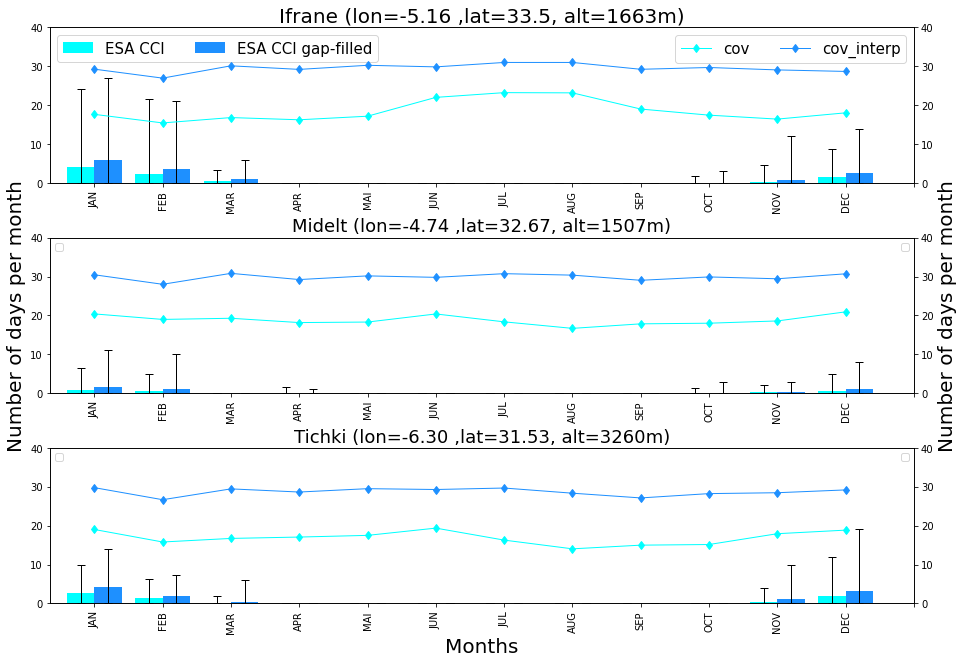

In [158]:
fig, axs=plt.subplots(3,1) 
# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=0.2,hspace=0.35)

# We fix the size of figure
set_size(12,8)     

, female, width=0.4
c1 = 'cyan'  
c2 = 'dodgerblue'
c3 = 'green'

ax = axs[0]
ifr.plot.bar(yerr=[IFR_scfg_ext,IFR_scfg_interp_ext], ax=ax, width=0.8, color=[c1, c2], grid=False,  capsize=4, error_kw=dict(ecolor='black',elinewidth=1))
ax.set_xlabel("", fontsize=10) 
ax.legend(labels = ["ESA CCI","ESA CCI gap-filled"], loc='upper left', fontsize = 15, ncol=3)
ax.set_title("Ifrane (lon=-5.16 ,lat=33.5, alt=1663m)", fontsize = 20)
ax.set_ylim(0,40)


ax2 = ax.twinx()

IFR_cov_mean['cov'].plot.line(ax=ax2, color=c1, marker='d', linewidth=1)
IFR_cov_mean['cov_interp'].plot.line(ax=ax2, color=c2, marker='d', linewidth=1)
ax2.legend(labels = ["cov", "cov_interp"], loc='upper right', fontsize = 15, ncol=2)
ax2.set_ylim(0,40)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12], labels=["JAN","FEB","MAR","APR","MAI","JUN","JUL","AUG","SEP","OCT","NOV","DEC",""], fontsize=8)

#=============================== Midelt ===========================================
ax = axs[1]
mid.plot.bar(yerr=[MID_scfg_ext,MID_scfg_interp_ext], ax=ax, width=0.8, color=[c1, c2], grid=False,  capsize=4, error_kw=dict(ecolor='black',elinewidth=1))
ax.set_xlabel("", fontsize=10) 
ax.set_ylabel("Number of days per month", fontsize=20)
ax.legend(labels = [], loc='upper left', fontsize = 10, ncol=3)
ax.set_title("Midelt (lon=-4.74 ,lat=32.67, alt=1507m)", fontsize = 18)
ax.set_ylim(0,40)


ax2 = ax.twinx()

MID_cov_mean['cov'].plot.line(ax=ax2, color=c1, marker='d', linewidth=1)
MID_cov_mean['cov_interp'].plot.line(ax=ax2, color=c2, marker='d', linewidth=1)
ax2.legend(labels = [], loc='upper right', fontsize = 10, ncol=2)
ax2.set_ylabel("Number of days per month", fontsize=20)
ax2.set_ylim(0,40)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12], labels=["JAN","FEB","MAR","APR","MAI","JUN","JUL","AUG","SEP","OCT","NOV","DEC",""], fontsize=8)

#=============================== Tichki ===========================================
ax = axs[2]
tic.plot.bar(yerr=[TIC_scfg_ext,TIC_scfg_interp_ext], ax=ax, width=0.8, color=[c1, c2], grid=False,  capsize=4, error_kw=dict(ecolor='black',elinewidth=1))
ax.set_xlabel("Months", fontsize=20) 
ax.legend(labels = ["Number of days per month"], loc='upper right', fontsize = 10, ncol=2)
ax.legend(labels = [], loc='upper left', fontsize = 10, ncol=3)
ax.set_title("Tichki (lon=-6.30 ,lat=31.53, alt=3260m)", fontsize = 18)
ax.set_ylim(0,40)

ax2 = ax.twinx()

TIC_cov_mean['cov'].plot.line(ax=ax2, color=c1, marker='d', linewidth=1)
TIC_cov_mean['cov_interp'].plot.line(ax=ax2, color=c2, marker='d', linewidth=1)
ax2.legend(labels = [], loc='upper right', fontsize = 10, ncol=2)
ax2.set_ylim(0,40)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12], labels=["JAN","FEB","MAR","APR","MAI","JUN","JUL","AUG","SEP","OCT","NOV","DEC",""], fontsize=8)

plt.savefig('comparison_esa_cci_gf_nongf_month_disp_IFR_MID_TIC.png')  

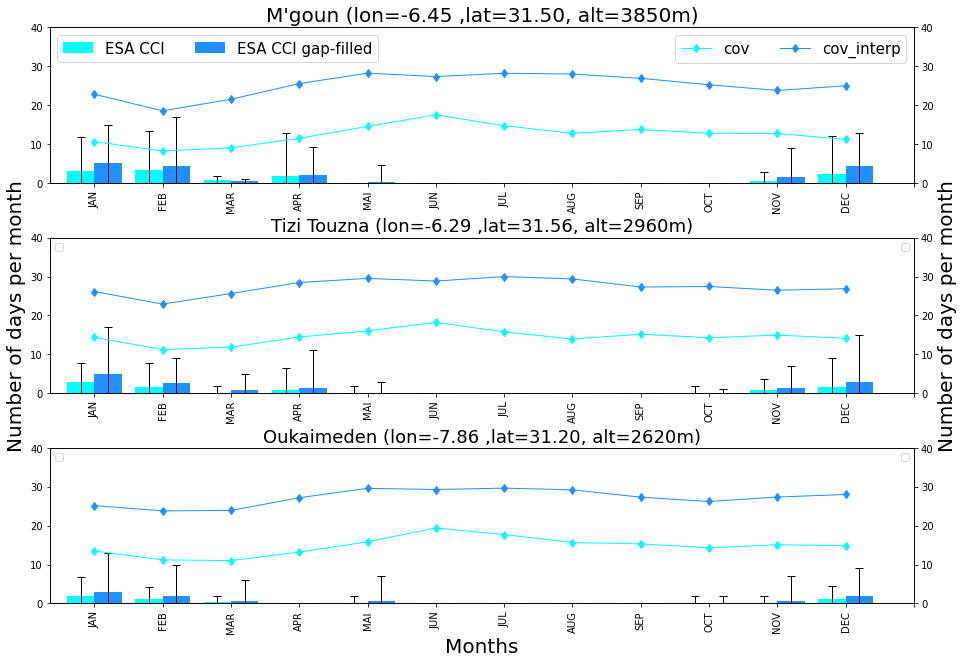

In [159]:
fig, axs=plt.subplots(3,1) 
# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=0.2,hspace=0.35)

# We fix the size of figure
set_size(12,8)     

, female, width=0.4
c1 = 'cyan'  
c2 = 'dodgerblue'
c3 = 'green'

#=============================== M'goun ===========================================
ax = axs[0]
mgn.plot.bar(yerr=[MGN_scfg_ext,MGN_scfg_interp_ext], ax=ax, width=0.8, color=[c1, c2], grid=False,  capsize=4, error_kw=dict(ecolor='black',elinewidth=1))
ax.set_xlabel("", fontsize=10) 
ax.legend(labels = ["ESA CCI","ESA CCI gap-filled"], loc='upper left', fontsize = 15, ncol=3)
ax.set_title("M'goun (lon=-6.45 ,lat=31.50, alt=3850m)", fontsize = 20)
ax.set_ylim(0,40)


ax2 = ax.twinx()

MGN_cov_mean['cov'].plot.line(ax=ax2, color=c1, marker='d', linewidth=1)
MGN_cov_mean['cov_interp'].plot.line(ax=ax2, color=c2, marker='d', linewidth=1)
ax2.legend(labels = ["cov", "cov_interp"], loc='upper right', fontsize = 15, ncol=2)
ax2.set_ylim(0,40)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12], labels=["JAN","FEB","MAR","APR","MAI","JUN","JUL","AUG","SEP","OCT","NOV","DEC",""], fontsize=8)

#=============================== Tizi Touzna ===========================================
ax = axs[1]
tiz.plot.bar(yerr=[TIZ_scfg_ext,TIZ_scfg_interp_ext], ax=ax, width=0.8, color=[c1, c2], grid=False,  capsize=4, error_kw=dict(ecolor='black',elinewidth=1))
ax.set_xlabel("", fontsize=10) 
ax.set_ylabel("Number of days per month", fontsize=20)
ax.legend(labels = [], loc='upper left', fontsize = 10, ncol=3)
ax.set_title("Tizi Touzna (lon=-6.29 ,lat=31.56, alt=2960m)", fontsize = 18)
ax.set_ylim(0,40)


ax2 = ax.twinx()

TIZ_cov_mean['cov'].plot.line(ax=ax2, color=c1, marker='d', linewidth=1)
TIZ_cov_mean['cov_interp'].plot.line(ax=ax2, color=c2, marker='d', linewidth=1)
ax2.legend(labels = [], loc='upper right', fontsize = 10, ncol=2)
ax2.set_ylabel("Number of days per month", fontsize=20)
ax2.set_ylim(0,40)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12], labels=["JAN","FEB","MAR","APR","MAI","JUN","JUL","AUG","SEP","OCT","NOV","DEC",""], fontsize=8)

#=============================== Oukaimeden ===========================================
ax = axs[2]
ouk.plot.bar(yerr=[OUK_scfg_ext,OUK_scfg_interp_ext], ax=ax, width=0.8, color=[c1, c2], grid=False,  capsize=4, error_kw=dict(ecolor='black',elinewidth=1))
ax.set_xlabel("Months", fontsize=20) 
ax.legend(labels = ["Number of days per month"], loc='upper right', fontsize = 10, ncol=2)
ax.legend(labels = [], loc='upper left', fontsize = 10, ncol=3)
ax.set_title("Oukaimeden (lon=-7.86 ,lat=31.20, alt=2620m)", fontsize = 18)
ax.set_ylim(0,40)

ax2 = ax.twinx()

OUK_cov_mean['cov'].plot.line(ax=ax2, color=c1, marker='d', linewidth=1)
OUK_cov_mean['cov_interp'].plot.line(ax=ax2, color=c2, marker='d', linewidth=1)
ax2.legend(labels = [], loc='upper right', fontsize = 10, ncol=2)
ax2.set_ylim(0,40)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12], labels=["JAN","FEB","MAR","APR","MAI","JUN","JUL","AUG","SEP","OCT","NOV","DEC",""], fontsize=8)

plt.savefig('comparison_esa_cci_gf_nongf_month_disp_MGN_TIZ_OUK.png')  

<h1 style="font-size:1.5rem; color:green;"> Impact on variability   </h1>

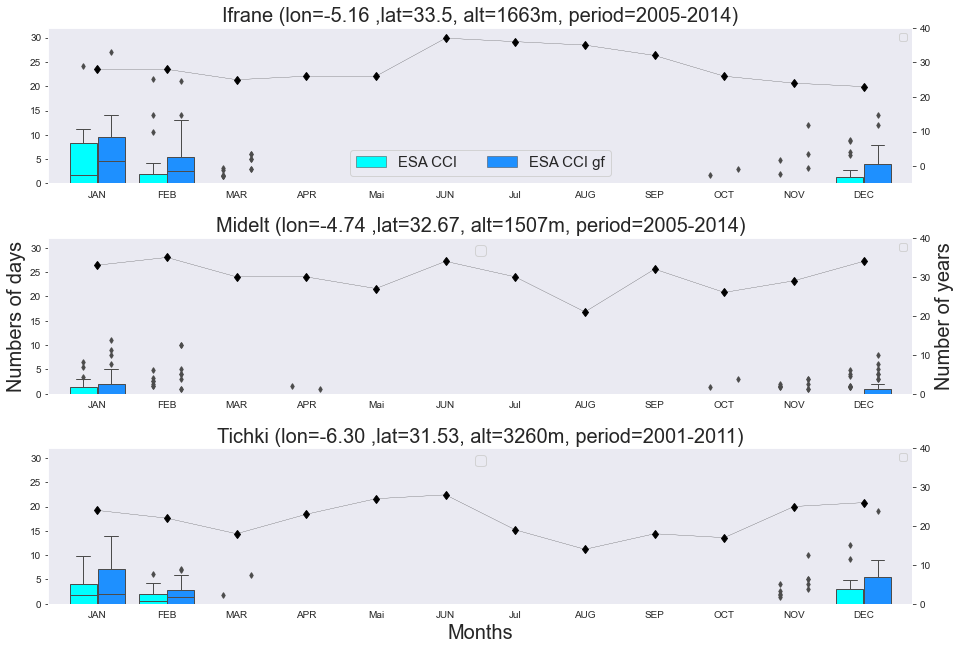

In [171]:
fig, axs=plt.subplots(3,1) 
# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=0.2,hspace=0.35)

# We fix the size of figure
set_size(12,8)     

, female, width=0.4
c1 = 'cyan'  
c2 = 'dodgerblue'

sns.set_style("dark")
#=============================== Ifrane ===========================================
ax = axs[0]
sns.boxplot(x="month", y='value',ax=ax, hue="variable", data=IFR_boxplot, palette = [c1,c2], width=0.8, saturation=1, linewidth=1, fliersize=4)
ax.set_xlabel("", fontsize=10) 
ax.set_ylabel("", fontsize=12)
ax.set_title("Ifrane (lon=-5.16 ,lat=33.5, alt=1663m, period=2005-2014)", fontsize = 20)
ax.set_ylim(0,32)
handles, _ = ax.get_legend_handles_labels()          # Get the artists.
ax.legend(handles, ["ESA CCI", "ESA CCI gf"], loc="lower center", ncol=4, fontsize=15) 

ax2 = ax.twinx()

IFR_disp.plot.line(ax=ax2, color="black", marker='d', linewidth=0.2)
ax2.set_ylabel("", fontsize=12)
ax2.legend(labels = "", loc='upper right', fontsize = 10, ncol=5)
ax2.set_ylim(-5,40)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=["JAN","FEB","MAR","APR","Mai","JUN","Jul","AUG","SEP","OCT","NOV","DEC",], fontsize=2)

#=============================== Midelt ===========================================
ax = axs[1]
sns.boxplot(x="month", y='value',ax=ax, hue="variable", data=MID_boxplot, palette = [c1,c2], width=0.8, saturation=1, linewidth=1, fliersize=4)
ax.set_xlabel("", fontsize=10) 
ax.set_ylabel("Numbers of days", fontsize=20)
ax.set_title("Midelt (lon=-4.74 ,lat=32.67, alt=1507m, period=2005-2014)", fontsize = 20)
ax.set_ylim(0,32)
handles, _ = ax.get_legend_handles_labels()          # Get the artists.
ax.legend(handles, [], loc="upper center", ncol=2, fontsize=14) 

ax2 = ax.twinx()

MID_disp.plot.line(ax=ax2, color="black", marker='d', linewidth=0.2)
ax2.set_ylabel("Number of years", fontsize=20)
ax2.legend(labels = "", loc='upper right', fontsize = 10, ncol=5)
ax2.set_ylim(0,40)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=["JAN","FEB","MAR","APR","Mai","JUN","Jul","AUG","SEP","OCT","NOV","DEC",], fontsize=2)

#=============================== Tichki ===========================================
ax = axs[2]
sns.boxplot(x="month", y='value',ax=ax, hue="variable", data=TIC_boxplot, palette = [c1,c2], width=0.8, saturation=1, linewidth=1, fliersize=4)
ax.set_xlabel("Months", fontsize=20) 
ax.set_ylabel("", fontsize=12)
ax.set_title("Tichki (lon=-6.30 ,lat=31.53, alt=3260m, period=2001-2011)", fontsize = 20)
ax.set_ylim(0,32)
handles, _ = ax.get_legend_handles_labels()          # Get the artists.
ax.legend(handles, [], loc="upper center", ncol=2, fontsize=14) 

ax2 = ax.twinx()

TIC_disp.plot.line(ax=ax2, color="black", marker='d', linewidth=0.2)
ax2.set_ylabel("", fontsize=12)
ax2.legend(labels = [], loc='upper right', fontsize = 10, ncol=5)
ax2.set_ylim(0,40)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=["JAN","FEB","MAR","APR","Mai","JUN","Jul","AUG","SEP","OCT","NOV","DEC",], fontsize=2)

plt.savefig('boxplot_ESA_VS_ESA_gf_IFR_MID_TIC.png')  

In [179]:
for m in [8,9,10]:
    aux = OUK_boxplot.where(OUK_boxplot['month']==7).dropna()
    aux['month'] = [m]*len(aux)                                          
    OUK_boxplot = pd.concat([OUK_boxplot, aux], axis=0)

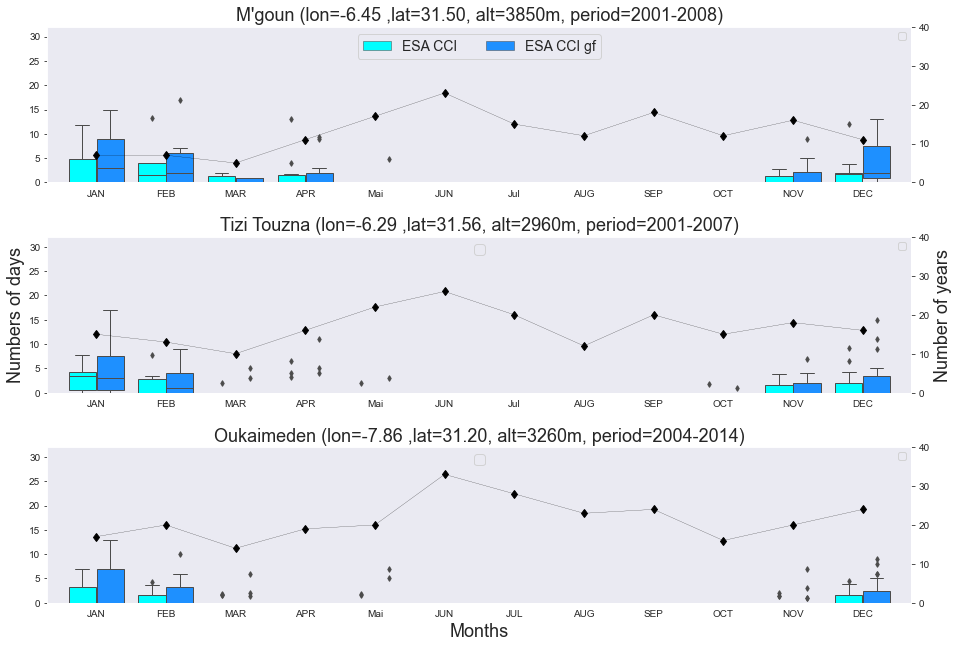

In [182]:
fig, axs=plt.subplots(3,1) 
# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=0.2,hspace=0.35)

# We fix the size of figure
set_size(12,8)     

, female, width=0.4
c1 = 'cyan'  
c2 = 'dodgerblue'

sns.set_style("dark")


#=============================== M'goun ===========================================
ax = axs[0]
sns.boxplot(x="month", y='value',ax=ax, hue="variable", data=MGN_boxplot, palette = [c1,c2], width=0.8, saturation=1, linewidth=1, fliersize=4)

ax.set_xlabel("", fontsize=10) 
ax.set_ylabel("", fontsize=12)
ax.set_title("M'goun (lon=-6.45 ,lat=31.50, alt=3850m, period=2001-2008)", fontsize = 18)
ax.set_ylim(0,32)
handles, _ = ax.get_legend_handles_labels()          # Get the artists.
ax.legend(handles, ["ESA CCI", "ESA CCI gf","In-situ", "Model"], loc="upper center", ncol=2, fontsize=14) 

ax2 = ax.twinx()

MGN_disp.plot.line(ax=ax2, color="black", marker='d', linewidth=0.2)
ax2.set_ylabel("", fontsize=12)
ax2.legend(labels = "", loc='upper right', fontsize = 10, ncol=5)
ax2.set_ylim(0,40)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=["JAN","FEB","MAR","APR","Mai","JUN","Jul","AUG","SEP","OCT","NOV","DEC",], fontsize=2)


#=============================== Tizi Touzna ===========================================
ax = axs[1]
sns.boxplot(x="month", y='value',ax=ax, hue="variable", data=TIZ_boxplot, palette = [c1,c2], width=0.8, saturation=1, linewidth=1, fliersize=4)

ax.set_xlabel("", fontsize=10) 
ax.set_ylabel("Numbers of days", fontsize=18)
ax.set_title("Tizi Touzna (lon=-6.29 ,lat=31.56, alt=2960m, period=2001-2007)", fontsize = 18)
ax.set_ylim(0,32)
handles, _ = ax.get_legend_handles_labels()          # Get the artists.
ax.legend(handles, [], loc="upper center", ncol=2, fontsize=14) 


ax2 = ax.twinx()

TIZ_disp.plot.line(ax=ax2, color="black", marker='d', linewidth=0.2)
ax2.set_ylabel("Number of years", fontsize=18)
ax2.legend(labels = "", loc='upper right', fontsize = 10, ncol=5)
ax2.set_ylim(0,40)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=["JAN","FEB","MAR","APR","Mai","JUN","Jul","AUG","SEP","OCT","NOV","DEC",], fontsize=2)


#=============================== Oukaimeden ===========================================
ax = axs[2]
sns.boxplot(x="month", y='value',ax=ax, hue="variable", data=OUK_boxplot, palette = [c1,c2], width=0.8, saturation=1, linewidth=1, fliersize=4)

ax.set_xlabel("Months", fontsize=18) 
ax.set_ylabel("", fontsize=12)
ax.set_title("Oukaimeden (lon=-7.86 ,lat=31.20, alt=3260m, period=2004-2014)", fontsize = 18)
ax.set_ylim(0,32)
handles, _ = ax.get_legend_handles_labels()          # Get the artists.
ax.legend(handles, [], loc="upper center", ncol=2, fontsize=14) 


ax2 = ax.twinx()

OUK_disp.plot.line(ax=ax2, color="black", marker='d', linewidth=0.2)
ax2.set_ylabel("", fontsize=12)
ax2.legend(labels = "", loc='upper right', fontsize = 10, ncol=5)
ax2.set_ylim(0,40)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=["JAN","FEB","MAR","APR","Mai","JUN","JUL","AUG","SEP","OCT","NOV","DEC"], fontsize=2)

plt.savefig('boxplot_ESA_VS_ESA_gf_MGN_TIZ_OUK.png')                                     

<h1 style="font-size:2rem; color:green;"> Impact on trend   </h1>

<div class="alert alert-block alert-success"; background-color:red> We calculate the trends in the four months of the wet period using the non-parametric Mann-Kendall test  </div> 

<h1 style="font-size:1.5rem; color:green;"> Ifrane </h1>

In [185]:
Snow_esa = IFR_scfg['scfg'].where(IFR_scfg['scfg'] > 0).groupby(by=[IFR_scfg.index.month,IFR_scfg.index.year]).count() 
Sum_esa = IFR_scfg['scfg'].where(IFR_scfg['scfg'] >= 0).groupby(by=[IFR_scfg.index.month,IFR_scfg.index.year]).count() 
Nan_esa = IFR_scfg['scfg'].where(IFR_scfg['scfg'] < 0).groupby(by=[IFR_scfg.index.month,IFR_scfg.index.year]).count()

years = [y for y in range(1981,2015)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa[mon][year]>15:
                Nan_esa[mon][year] = -9999
                Snow_esa[mon][year] = -9999
                
        except KeyError:  
            continue            

             
Nan_esa = Nan_esa.replace(-9999, np.nan)
Snow_esa = Snow_esa.replace(-9999, np.nan)
  
IFR_scfg_Sdays =   Snow_esa + Snow_esa*Nan_esa/Sum_esa                 

In [186]:
Snow_esa = IFR_scfg['scfg'].where(IFR_scfg['scfg'] > 0).groupby(by=[IFR_scfg.index.month,IFR_scfg.index.year]).count() 
Sum_esa = IFR_scfg['scfg'].where(IFR_scfg['scfg'] >= 0).groupby(by=[IFR_scfg.index.month,IFR_scfg.index.year]).count() 
Nan_esa = IFR_scfg['scfg'].where(IFR_scfg['scfg'] < 0).groupby(by=[IFR_scfg.index.month,IFR_scfg.index.year]).count()

Snow_esa_gf = IFR_scfg_interp['scfg_interp'].where(IFR_scfg_interp['scfg_interp'] > 0).groupby(by=[IFR_scfg_interp.index.month,IFR_scfg_interp.index.year]).count() 
Sum_esa_gf = IFR_scfg_interp['scfg_interp'].where(IFR_scfg_interp['scfg_interp'] >= 0).groupby(by=[IFR_scfg_interp.index.month,IFR_scfg_interp.index.year]).count() 
Nan_esa_gf = IFR_scfg_interp['scfg_interp'].where(IFR_scfg_interp['scfg_interp'] < 0).groupby(by=[IFR_scfg_interp.index.month,IFR_scfg_interp.index.year]).count()

years = [y for y in range(1982,2019)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa[mon][year]>15:
                Nan_esa[mon][year] = -9999
                Snow_esa[mon][year] = -9999
                
        except KeyError:
            continue            
            
years = [y for y in range(1982,2019)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa_gf[mon][year]>15:
                Nan_esa_gf[mon][year] = -9999
                Snow_esa_gf[mon][year] = -9999
                
        except KeyError:
            continue
             
Nan_esa = Nan_esa.replace(-9999, np.nan)
Snow_esa = Snow_esa.replace(-9999, np.nan)

Nan_esa_gf = Nan_esa_gf.replace(-9999, np.nan)
Snow_esa_gf = Snow_esa_gf.replace(-9999, np.nan)
       
IFR_scfg_Sdays =   Snow_esa + Snow_esa*Nan_esa/Sum_esa            
IFR_scfg_interp_Sdays =   Snow_esa_gf  + Snow_esa_gf*Nan_esa_gf/Sum_esa_gf      

<h1 style="font-size:1.5rem; color:green;"> Midelt </h1>

In [187]:
Snow_esa = MID_scfg['scfg'].where(MID_scfg['scfg'] > 0).groupby(by=[MID_scfg.index.month,MID_scfg.index.year]).count() 
Sum_esa = MID_scfg['scfg'].where(MID_scfg['scfg'] >= 0).groupby(by=[MID_scfg.index.month,MID_scfg.index.year]).count() 
Nan_esa = MID_scfg['scfg'].where(MID_scfg['scfg'] < 0).groupby(by=[MID_scfg.index.month,MID_scfg.index.year]).count()

years = [y for y in range(1981,2015)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa[mon][year]>15:
                Nan_esa[mon][year] = -9999
                Snow_esa[mon][year] = -9999               
        except KeyError:
            continue 
            
Nan_esa = Nan_esa.replace(-9999, np.nan)
Snow_esa = Snow_esa.replace(-9999, np.nan)
  
MID_scfg_Sdays =   Snow_esa + Snow_esa*Nan_esa/Sum_esa                 

In [188]:
Snow_esa = MID_scfg['scfg'].where(MID_scfg['scfg'] > 0).groupby(by=[MID_scfg.index.month,MID_scfg.index.year]).count() 
Sum_esa = MID_scfg['scfg'].where(MID_scfg['scfg'] >= 0).groupby(by=[MID_scfg.index.month,MID_scfg.index.year]).count() 
Nan_esa = MID_scfg['scfg'].where(MID_scfg['scfg'] < 0).groupby(by=[MID_scfg.index.month,MID_scfg.index.year]).count()

Snow_esa_gf = MID_scfg_interp['scfg_interp'].where(MID_scfg_interp['scfg_interp'] > 0).groupby(by=[MID_scfg_interp.index.month,MID_scfg_interp.index.year]).count() 
Sum_esa_gf = MID_scfg_interp['scfg_interp'].where(MID_scfg_interp['scfg_interp'] >= 0).groupby(by=[MID_scfg_interp.index.month,MID_scfg_interp.index.year]).count() 
Nan_esa_gf = MID_scfg_interp['scfg_interp'].where(MID_scfg_interp['scfg_interp'] < 0).groupby(by=[MID_scfg_interp.index.month,MID_scfg_interp.index.year]).count()

years = [y for y in range(1982,2019)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa[mon][year]>15:
                Nan_esa[mon][year] = -9999
                Snow_esa[mon][year] = -9999               
        except KeyError:
            continue 
            
years = [y for y in range(1982,2019)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa_gf[mon][year]>15:
                Nan_esa_gf[mon][year] = -9999
                Snow_esa_gf[mon][year] = -9999
                
        except KeyError:
            continue
            
Nan_esa = Nan_esa.replace(-9999, np.nan)
Snow_esa = Snow_esa.replace(-9999, np.nan)

Nan_esa_gf = Nan_esa_gf.replace(-9999, np.nan)
Snow_esa_gf = Snow_esa_gf.replace(-9999, np.nan)
       
MID_scfg_Sdays =   Snow_esa + Snow_esa*Nan_esa/Sum_esa            
MID_scfg_interp_Sdays =   Snow_esa_gf  + Snow_esa_gf*Nan_esa_gf/Sum_esa_gf      

<h1 style="font-size:1.5rem; color:green;"> Tichki </h1>

In [189]:
Snow_esa = TIC_scfg['scfg'].where(TIC_scfg['scfg'] > 0).groupby(by=[TIC_scfg.index.month,TIC_scfg.index.year]).count() 
Sum_esa = TIC_scfg['scfg'].where(TIC_scfg['scfg'] >= 0).groupby(by=[TIC_scfg.index.month,TIC_scfg.index.year]).count() 
Nan_esa = TIC_scfg['scfg'].where(TIC_scfg['scfg'] < 0).groupby(by=[TIC_scfg.index.month,TIC_scfg.index.year]).count()

years = [y for y in range(1981,2015)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa[mon][year]>15:
                Nan_esa[mon][year] = -9999
                Snow_esa[mon][year] = -9999
                
        except KeyError:
            continue 
            
Nan_esa = Nan_esa.replace(-9999, np.nan)
Snow_esa = Snow_esa.replace(-9999, np.nan)

TIC_scfg_Sdays =   Snow_esa + Snow_esa*Nan_esa/Sum_esa                 

In [190]:
Snow_esa = TIC_scfg['scfg'].where(TIC_scfg['scfg'] > 0).groupby(by=[TIC_scfg.index.month,TIC_scfg.index.year]).count() 
Sum_esa = TIC_scfg['scfg'].where(TIC_scfg['scfg'] >= 0).groupby(by=[TIC_scfg.index.month,TIC_scfg.index.year]).count() 
Nan_esa = TIC_scfg['scfg'].where(TIC_scfg['scfg'] < 0).groupby(by=[TIC_scfg.index.month,TIC_scfg.index.year]).count()

Snow_esa_gf = TIC_scfg_interp['scfg_interp'].where(TIC_scfg_interp['scfg_interp'] > 0).groupby(by=[TIC_scfg_interp.index.month,TIC_scfg_interp.index.year]).count() 
Sum_esa_gf = TIC_scfg_interp['scfg_interp'].where(TIC_scfg_interp['scfg_interp'] >= 0).groupby(by=[TIC_scfg_interp.index.month,TIC_scfg_interp.index.year]).count() 
Nan_esa_gf = TIC_scfg_interp['scfg_interp'].where(TIC_scfg_interp['scfg_interp'] < 0).groupby(by=[TIC_scfg_interp.index.month,TIC_scfg_interp.index.year]).count()

years = [y for y in range(1982,2019)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa[mon][year]>15:
                Nan_esa[mon][year] = -9999
                Snow_esa[mon][year] = -9999
                
        except KeyError:
            continue 
            
years = [y for y in range(1982,2019)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa_gf[mon][year]>15:
                Nan_esa_gf[mon][year] = -9999
                Snow_esa_gf[mon][year] = -9999
                
        except KeyError:
            continue
            
Nan_esa = Nan_esa.replace(-9999, np.nan)
Snow_esa = Snow_esa.replace(-9999, np.nan)

Nan_esa_gf = Nan_esa_gf.replace(-9999, np.nan)
Snow_esa_gf = Snow_esa_gf.replace(-9999, np.nan)
       
TIC_scfg_Sdays =   Snow_esa + Snow_esa*Nan_esa/Sum_esa            
TIC_scfg_interp_Sdays =   Snow_esa_gf  + Snow_esa_gf*Nan_esa_gf/Sum_esa_gf      

<h1 style="font-size:1.5rem; color:green;"> M'goun </h1>

In [191]:
Snow_esa = MGN_scfg['scfg'].where(MGN_scfg['scfg'] > 0).groupby(by=[MGN_scfg.index.month,MGN_scfg.index.year]).count() 
Sum_esa = MGN_scfg['scfg'].where(MGN_scfg['scfg'] >= 0).groupby(by=[MGN_scfg.index.month,MGN_scfg.index.year]).count() 
Nan_esa = MGN_scfg['scfg'].where(MGN_scfg['scfg'] < 0).groupby(by=[MGN_scfg.index.month,MGN_scfg.index.year]).count()

years = [y for y in range(1981,2015)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa[mon][year]>15:
                Nan_esa[mon][year] = -9999
                Snow_esa[mon][year] = -9999
                
        except KeyError:
            continue 
            
Nan_esa = Nan_esa.replace(-9999, np.nan)
Snow_esa = Snow_esa.replace(-9999, np.nan)
  
MGN_scfg_Sdays =   Snow_esa + Snow_esa*Nan_esa/Sum_esa              

In [192]:
Snow_esa = MGN_scfg['scfg'].where(MGN_scfg['scfg'] > 0).groupby(by=[MGN_scfg.index.month,MGN_scfg.index.year]).count() 
Sum_esa = MGN_scfg['scfg'].where(MGN_scfg['scfg'] >= 0).groupby(by=[MGN_scfg.index.month,MGN_scfg.index.year]).count() 
Nan_esa = MGN_scfg['scfg'].where(MGN_scfg['scfg'] < 0).groupby(by=[MGN_scfg.index.month,MGN_scfg.index.year]).count()

Snow_esa_gf = MGN_scfg_interp['scfg_interp'].where(MGN_scfg_interp['scfg_interp'] > 0).groupby(by=[MGN_scfg_interp.index.month,MGN_scfg_interp.index.year]).count() 
Sum_esa_gf = MGN_scfg_interp['scfg_interp'].where(MGN_scfg_interp['scfg_interp'] >= 0).groupby(by=[MGN_scfg_interp.index.month,MGN_scfg_interp.index.year]).count() 
Nan_esa_gf = MGN_scfg_interp['scfg_interp'].where(MGN_scfg_interp['scfg_interp'] < 0).groupby(by=[MGN_scfg_interp.index.month,MGN_scfg_interp.index.year]).count()

years = [y for y in range(1982,2019)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa[mon][year]>15:
                Nan_esa[mon][year] = -9999
                Snow_esa[mon][year] = -9999
                
        except KeyError:
            continue 
            
years = [y for y in range(1982,2019)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa_gf[mon][year]>15:
                Nan_esa_gf[mon][year] = -9999
                Snow_esa_gf[mon][year] = -9999
                
        except KeyError:
            continue
            
            
Nan_esa = Nan_esa.replace(-9999, np.nan)
Snow_esa = Snow_esa.replace(-9999, np.nan)

Nan_esa_gf = Nan_esa_gf.replace(-9999, np.nan)
Snow_esa_gf = Snow_esa_gf.replace(-9999, np.nan)
       
MGN_scfg_Sdays =   Snow_esa + Snow_esa*Nan_esa/Sum_esa            
MGN_scfg_interp_Sdays =   Snow_esa_gf  + Snow_esa_gf*Nan_esa_gf/Sum_esa_gf      

<h1 style="font-size:1.5rem; color:green;"> Tizi Touzna </h1>

In [193]:
Snow_esa = TIZ_scfg['scfg'].where(TIZ_scfg['scfg'] > 0).groupby(by=[TIZ_scfg.index.month,TIZ_scfg.index.year]).count() 
Sum_esa = TIZ_scfg['scfg'].where(TIZ_scfg['scfg'] >= 0).groupby(by=[TIZ_scfg.index.month,TIZ_scfg.index.year]).count() 
Nan_esa = TIZ_scfg['scfg'].where(TIZ_scfg['scfg'] < 0).groupby(by=[TIZ_scfg.index.month,TIZ_scfg.index.year]).count()

years = [y for y in range(1981,2015)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa[mon][year]>15:
                Nan_esa[mon][year] = -9999
                Snow_esa[mon][year] = -9999
              
        except KeyError:
            continue 
            
Nan_esa = Nan_esa.replace(-9999, np.nan)
Snow_esa = Snow_esa.replace(-9999, np.nan)
      
TIZ_scfg_Sdays =   Snow_esa + Snow_esa*Nan_esa/Sum_esa                 

In [194]:
Snow_esa = TIZ_scfg['scfg'].where(TIZ_scfg['scfg'] > 0).groupby(by=[TIZ_scfg.index.month,TIZ_scfg.index.year]).count() 
Sum_esa = TIZ_scfg['scfg'].where(TIZ_scfg['scfg'] >= 0).groupby(by=[TIZ_scfg.index.month,TIZ_scfg.index.year]).count() 
Nan_esa = TIZ_scfg['scfg'].where(TIZ_scfg['scfg'] < 0).groupby(by=[TIZ_scfg.index.month,TIZ_scfg.index.year]).count()

Snow_esa_gf = TIZ_scfg_interp['scfg_interp'].where(TIZ_scfg_interp['scfg_interp'] > 0).groupby(by=[TIZ_scfg_interp.index.month,TIZ_scfg_interp.index.year]).count() 
Sum_esa_gf = TIZ_scfg_interp['scfg_interp'].where(TIZ_scfg_interp['scfg_interp'] >= 0).groupby(by=[TIZ_scfg_interp.index.month,TIZ_scfg_interp.index.year]).count() 
Nan_esa_gf = TIZ_scfg_interp['scfg_interp'].where(TIZ_scfg_interp['scfg_interp'] < 0).groupby(by=[TIZ_scfg_interp.index.month,TIZ_scfg_interp.index.year]).count()

years = [y for y in range(1982,2019)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa[mon][year]>15:
                Nan_esa[mon][year] = -9999
                Snow_esa[mon][year] = -9999
              
        except KeyError:
            continue 
            
years = [y for y in range(1982,2019)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa_gf[mon][year]>15:
                Nan_esa_gf[mon][year] = -9999
                Snow_esa_gf[mon][year] = -9999
                
        except KeyError:
            continue
            
Nan_esa = Nan_esa.replace(-9999, np.nan)
Snow_esa = Snow_esa.replace(-9999, np.nan)

Nan_esa_gf = Nan_esa_gf.replace(-9999, np.nan)
Snow_esa_gf = Snow_esa_gf.replace(-9999, np.nan)
       
TIZ_scfg_Sdays =   Snow_esa + Snow_esa*Nan_esa/Sum_esa            
TIZ_scfg_interp_Sdays =   Snow_esa_gf  + Snow_esa_gf*Nan_esa_gf/Sum_esa_gf      

<h1 style="font-size:1.5rem; color:green;"> Oukaimeden </h1>

In [195]:
Snow_esa = OUK_scfg['scfg'].where(OUK_scfg['scfg'] > 0).groupby(by=[OUK_scfg.index.month,OUK_scfg.index.year]).count() 
Sum_esa = OUK_scfg['scfg'].where(OUK_scfg['scfg'] >= 0).groupby(by=[OUK_scfg.index.month,OUK_scfg.index.year]).count() 
Nan_esa = OUK_scfg['scfg'].where(OUK_scfg['scfg'] < 0).groupby(by=[OUK_scfg.index.month,OUK_scfg.index.year]).count()

years = [y for y in range(1981,2015)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa[mon][year]>15:
                Nan_esa[mon][year] = -9999
                Snow_esa[mon][year] = -9999
                
        except KeyError:
            continue 
                     
Nan_esa = Nan_esa.replace(-9999, np.nan)
Snow_esa = Snow_esa.replace(-9999, np.nan)
    
OUK_scfg_Sdays =   Snow_esa + Snow_esa*Nan_esa/Sum_esa              

In [196]:
Snow_esa = OUK_scfg['scfg'].where(OUK_scfg['scfg'] > 0).groupby(by=[OUK_scfg.index.month,OUK_scfg.index.year]).count() 
Sum_esa = OUK_scfg['scfg'].where(OUK_scfg['scfg'] >= 0).groupby(by=[OUK_scfg.index.month,OUK_scfg.index.year]).count() 
Nan_esa = OUK_scfg['scfg'].where(OUK_scfg['scfg'] < 0).groupby(by=[OUK_scfg.index.month,OUK_scfg.index.year]).count()

Snow_esa_gf = OUK_scfg_interp['scfg_interp'].where(OUK_scfg_interp['scfg_interp'] > 0).groupby(by=[OUK_scfg_interp.index.month,OUK_scfg_interp.index.year]).count() 
Sum_esa_gf = OUK_scfg_interp['scfg_interp'].where(OUK_scfg_interp['scfg_interp'] >= 0).groupby(by=[OUK_scfg_interp.index.month,OUK_scfg_interp.index.year]).count() 
Nan_esa_gf = OUK_scfg_interp['scfg_interp'].where(OUK_scfg_interp['scfg_interp'] < 0).groupby(by=[OUK_scfg_interp.index.month,OUK_scfg_interp.index.year]).count()

years = [y for y in range(1982,2019)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa[mon][year]>15:
                Nan_esa[mon][year] = -9999
                Snow_esa[mon][year] = -9999
                
        except KeyError:
            continue 
            
years = [y for y in range(1982,2019)]
for mon in range(1,13):
    for year in years:
        try: 
            if Nan_esa_gf[mon][year]>15:
                Nan_esa_gf[mon][year] = -9999
                Snow_esa_gf[mon][year] = -9999
                
        except KeyError:
            continue    
            
Nan_esa = Nan_esa.replace(-9999, np.nan)
Snow_esa = Snow_esa.replace(-9999, np.nan)

Nan_esa_gf = Nan_esa_gf.replace(-9999, np.nan)
Snow_esa_gf = Snow_esa_gf.replace(-9999, np.nan)
       
OUK_scfg_Sdays =   Snow_esa + Snow_esa*Nan_esa/Sum_esa            
OUK_scfg_interp_Sdays =   Snow_esa_gf  + Snow_esa_gf*Nan_esa_gf/Sum_esa_gf      

In [210]:
IFR = pd.DataFrame(columns=["month","slope_orig","p_orig","slope_gf","p_gf"])
MID = pd.DataFrame(columns=["month","slope_orig","p_orig","slope_gf","p_gf"])
TIC = pd.DataFrame(columns=["month","slope_orig","p_orig","slope_gf","p_gf"])
MGN = pd.DataFrame(columns=["month","slope_orig","p_orig","slope_gf","p_gf"])
TIZ = pd.DataFrame(columns=["month","slope_orig","p_orig","slope_gf","p_gf"])
OUK = pd.DataFrame(columns=["month","slope_orig","p_orig","slope_gf","p_gf"])

In [211]:
df = pd.DataFrame(columns=["month","slope_orig","p_orig","slope_gf","p_gf"])

In [212]:
label = ["IFR","MID","TIC","MGN","TIZ","OUK"]

In [213]:
stations = [IFR,MID,TIC,MGN,TIZ,OUK]
stations_org = [IFR_scfg_Sdays, MID_scfg_Sdays, TIC_scfg_Sdays, MGN_scfg_Sdays, TIZ_scfg_Sdays, OUK_scfg_Sdays]
stations_gf = [IFR_scfg_interp_Sdays, MID_scfg_interp_Sdays, TIC_scfg_interp_Sdays, MGN_scfg_interp_Sdays, TIZ_scfg_interp_Sdays, OUK_scfg_interp_Sdays]

In [214]:
for s in range(6):
    slope_orig = []
    slope_gf= []
    p_orig = []
    p_gf = []
    for mon in range(1,13):
        slope_orig.append(mk.original_test(stations_org[s][mon]).slope)
        p_orig.append(mk.original_test(stations_org[s][mon]).p)
        
        slope_gf.append(mk.original_test(stations_gf[s][mon]).slope)
        p_gf.append(mk.original_test(stations_gf[s][mon]).p)
    
    stations[s]['month'] = [1,2,3,4,5,6,7,8,9,10,11,12]
    stations[s]['slope_orig'] = slope_orig
    stations[s]['p_orig'] = p_orig
    stations[s]['slope_gf'] = slope_gf
    stations[s]['p_gf'] = p_gf
    df = pd.concat([df,stations[s]], axis=1)
print(df)
df.to_csv('trend_ESA_orig_1982-2018_all_stat.csv')

    month  slope_orig  p_orig  slope_gf  p_gf  month  slope_orig    p_orig  \
0     NaN         NaN     NaN       NaN   NaN      1         0.0  0.390773   
1     NaN         NaN     NaN       NaN   NaN      2         0.0  0.575129   
2     NaN         NaN     NaN       NaN   NaN      3         0.0  0.509867   
3     NaN         NaN     NaN       NaN   NaN      4         0.0  1.000000   
4     NaN         NaN     NaN       NaN   NaN      5         0.0  1.000000   
5     NaN         NaN     NaN       NaN   NaN      6         0.0  1.000000   
6     NaN         NaN     NaN       NaN   NaN      7         0.0  1.000000   
7     NaN         NaN     NaN       NaN   NaN      8         0.0  1.000000   
8     NaN         NaN     NaN       NaN   NaN      9         0.0  1.000000   
9     NaN         NaN     NaN       NaN   NaN     10         0.0  1.000000   
10    NaN         NaN     NaN       NaN   NaN     11         0.0  0.834754   
11    NaN         NaN     NaN       NaN   NaN     12         0.0

## Gap-filling effect on trends

<div class="alert alert-block alert-success"; background-color:red> Now we visualize the curves of the monthly values of number of days with snow over land with the trend curves and the values of trend parameters  </div> 

<h1 style="font-size:1.5rem; color:green;"> Ifrane </h1>

Text(0.5, 0, 'years')

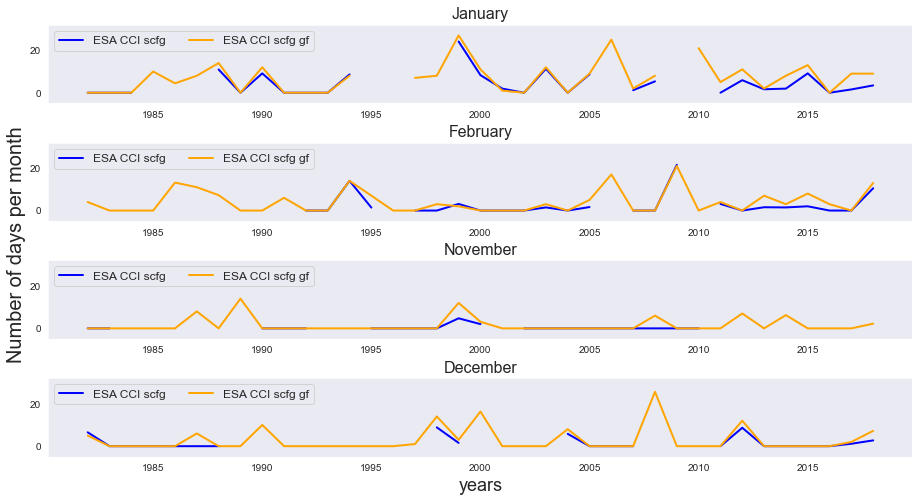

In [215]:
labels_months = ["January","February", "November", "December"]
labels_legend = ['ESA CCI scfg', 'ESA CCI scfg gf']

fig, axs=plt.subplots(4,1) 

# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=1,hspace=0.5)

# We fix the size of figure
set_size(12,6)
c1 = 'blue'
c2 = 'orange'
mons=[1,2,11,12]
for i in range(4):
    IFR_scfg_Sdays[mons[i]].plot(ax=axs[i], color=c1, linewidth=2)
    IFR_scfg_interp_Sdays[mons[i]].plot(ax=axs[i], color=c2, linewidth=2)
    axs[i].set_title(labels_months[i], fontsize=16)
    axs[i].set_xlabel("", fontsize=18)
    axs[i].legend(labels = labels_legend, loc='upper left', ncol=2, fontsize=12) 
    axs[i].set_ylim(-5,32)

axs[2].set_ylabel("                    Number of days per month", fontsize=20)
axs[3].set_xlabel("years", fontsize=18)

#plt.savefig('IFR_mon_value_timeserie.png') 

<h1 style="font-size:1.5rem; color:green;"> Midelt </h1>

Text(0.5, 0, 'years')

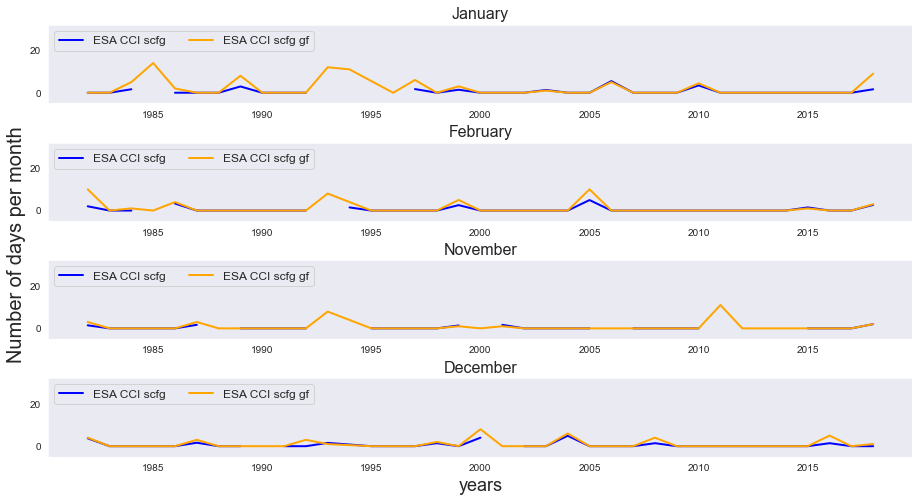

In [217]:
fig, axs=plt.subplots(4,1) 

# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=1,hspace=0.5)

# We fix the size of figure
set_size(12,6)
c1 = 'blue'
c2 = 'orange'
mons=[1,2,11,12]
for i in range(4):
    MID_scfg_Sdays[mons[i]].plot(ax=axs[i], color=c1, linewidth=2)
    MID_scfg_interp_Sdays[mons[i]].plot(ax=axs[i], color=c2, linewidth=2)
    axs[i].set_title(labels_months[i], fontsize=16)
    axs[i].set_xlabel("", fontsize=18)
    axs[i].legend(labels = labels_legend, loc='upper left', ncol=2, fontsize=12) 
    axs[i].set_ylim(-5,32)

axs[2].set_ylabel("                    Number of days per month", fontsize=20)
axs[3].set_xlabel("years", fontsize=18)
#plt.savefig('MID_mon_value_timeserie.png') 

<h1 style="font-size:1.5rem; color:green;"> Tichki </h1>

Text(0.5, 0, 'years')

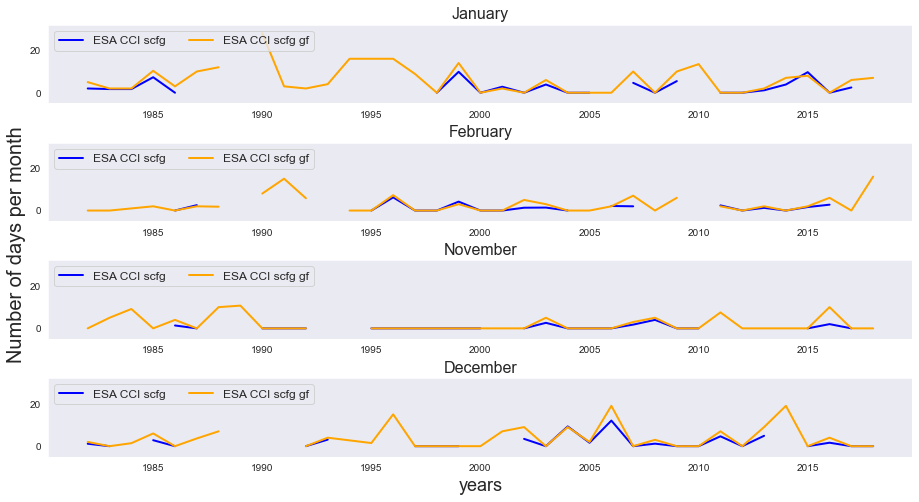

In [218]:
fig, axs=plt.subplots(4,1) 

# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=1,hspace=0.5)

# We fix the size of figure
set_size(12,6)
c1 = 'blue'
c2 = 'orange'
mons=[1,2,11,12]
for i in range(4):
    TIC_scfg_Sdays[mons[i]].plot(ax=axs[i], color=c1, linewidth=2)
    TIC_scfg_interp_Sdays[mons[i]].plot(ax=axs[i], color=c2, linewidth=2)
    axs[i].set_title(labels_months[i], fontsize=16)
    axs[i].set_xlabel("", fontsize=18)
    axs[i].legend(labels = labels_legend, loc='upper left', ncol=2, fontsize=12) 
    axs[i].set_ylim(-5,32)

axs[2].set_ylabel("                    Number of days per month", fontsize=20)
axs[3].set_xlabel("years", fontsize=18)
#plt.savefig('TIC_mon_value_timeserie.png') 

<h1 style="font-size:1.5rem; color:green;"> M'goun </h1>

Text(0.5, 0, 'years')

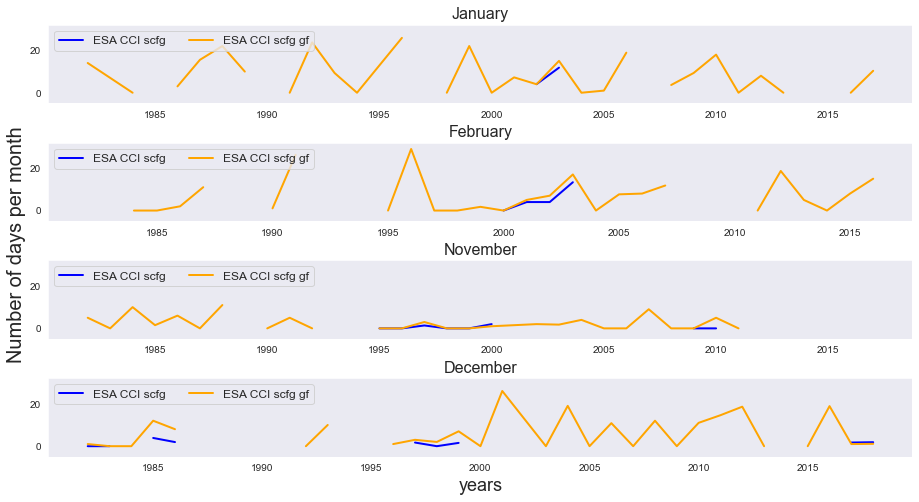

In [219]:
fig, axs=plt.subplots(4,1) 

# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=1,hspace=0.5)

# We fix the size of figure
set_size(12,6)
c1 = 'blue'
c2 = 'orange'
mons=[1,2,11,12]
for i in range(4):
    MGN_scfg_Sdays[mons[i]].plot(ax=axs[i], color=c1, linewidth=2)
    MGN_scfg_interp_Sdays[mons[i]].plot(ax=axs[i], color=c2, linewidth=2)
    axs[i].set_title(labels_months[i], fontsize=16)
    axs[i].set_xlabel("", fontsize=18)
    axs[i].legend(labels = labels_legend, loc='upper left', ncol=2, fontsize=12) 
    axs[i].set_ylim(-5,32)

axs[2].set_ylabel("                    Number of days per month", fontsize=20)
axs[3].set_xlabel("years", fontsize=18)
#plt.savefig('MGN_mon_value_timeserie.png') 

<h1 style="font-size:1.5rem; color:green;"> Tizi Touzna </h1>

Text(0.5, 0, 'years')

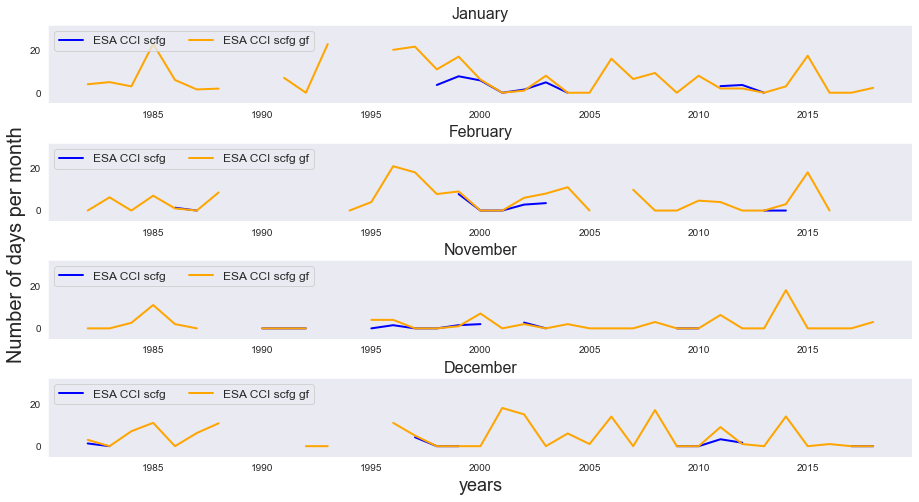

In [220]:
fig, axs=plt.subplots(4,1) 

# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=1,hspace=0.5)

# We fix the size of figure
set_size(12,6)
c1 = 'blue'
c2 = 'orange'
mons=[1,2,11,12]
for i in range(4):
    TIZ_scfg_Sdays[mons[i]].plot(ax=axs[i], color=c1, linewidth=2)
    TIZ_scfg_interp_Sdays[mons[i]].plot(ax=axs[i], color=c2, linewidth=2)
    axs[i].set_title(labels_months[i], fontsize=16)
    axs[i].set_xlabel("", fontsize=18)
    axs[i].legend(labels = labels_legend, loc='upper left', ncol=2, fontsize=12) 
    axs[i].set_ylim(-5,32)

axs[2].set_ylabel("                    Number of days per month", fontsize=20)
axs[3].set_xlabel("years", fontsize=18)

#plt.savefig('TIZ_mon_value_timeserie.png')  

<h1 style="font-size:1.5rem; color:green;"> Oukaimeden </h1>

Text(0.5, 0, 'years')

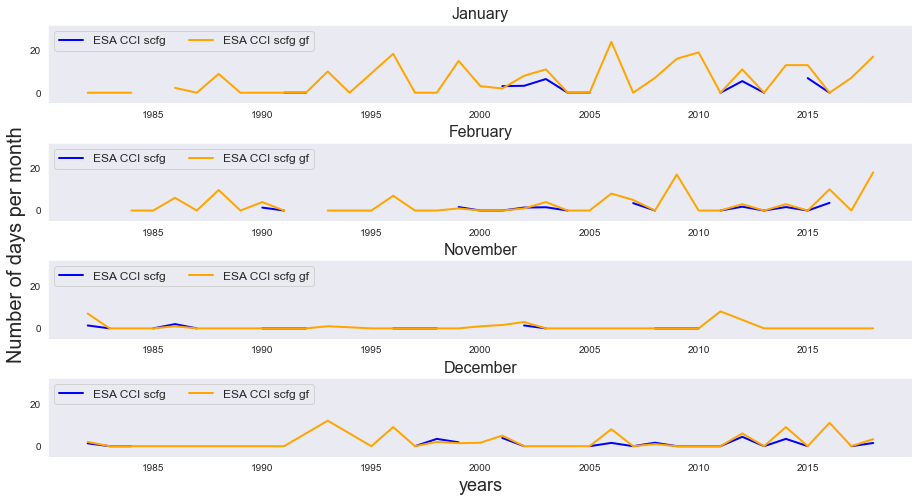

In [221]:
fig, axs=plt.subplots(4,1) 

# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=1,hspace=0.5)

# We fix the size of figure
set_size(12,6)
c1 = 'blue'
c2 = 'orange'
mons=[1,2,11,12]
for i in range(4):
    OUK_scfg_Sdays[mons[i]].plot(ax=axs[i], color=c1, linewidth=2)
    OUK_scfg_interp_Sdays[mons[i]].plot(ax=axs[i], color=c2, linewidth=2)
    axs[i].set_title(labels_months[i], fontsize=16)
    axs[i].set_xlabel("", fontsize=18)
    axs[i].legend(labels = labels_legend, loc='upper left', ncol=2, fontsize=12) 
    axs[i].set_ylim(-5,32)

axs[2].set_ylabel("                    Number of days per month", fontsize=20)
axs[3].set_xlabel("years", fontsize=18)
#plt.savefig('OUK_mon_value_timeserie.png')  

<h1 style="font-size:1.5rem; color:green;"> Ifrane </h1>

Text(0, 0.5, '                                                                     Number of days per month')

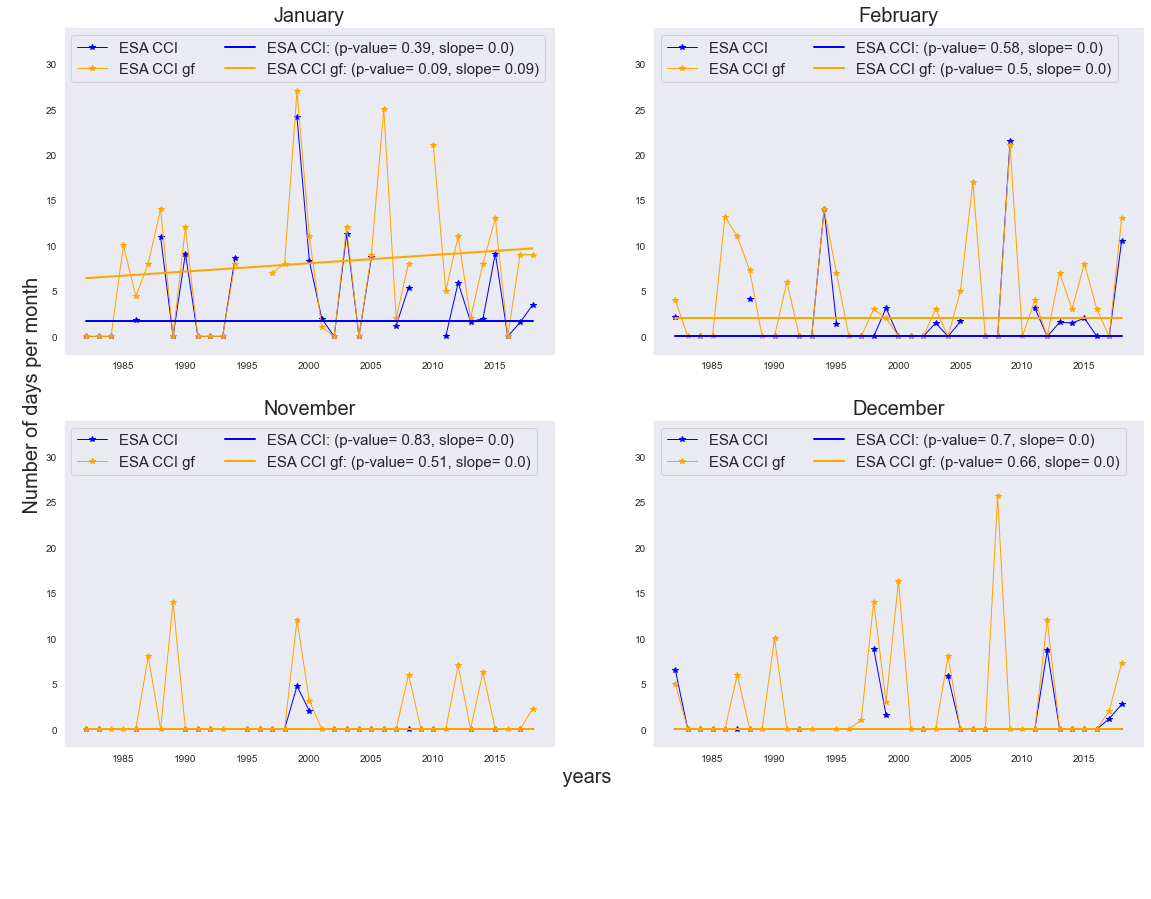

In [223]:
labels_months = ["January", "February", "November", "December"]

fig, axs=plt.subplots(2,2)

# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=0.2,hspace=0.2)

c1 = 'blue'  
c2 = 'orange'
c3 = 'green'


# We fix the size of figure
set_size(15,10)

mons=[1,2,11,12]
years = [int(y) for y in range(1982,2019)]
index = 0
for i in range(2):
    for j in range(2):
        slope = mk.original_test(IFR_scfg_Sdays[mons[index]]).slope
        slope_gf = mk.original_test(IFR_scfg_interp_Sdays[mons[index]]).slope
    
        p = mk.original_test(IFR_scfg_Sdays[mons[index]]).p
        p_gf = mk.original_test(IFR_scfg_interp_Sdays[mons[index]]).p

        interc = mk.original_test(IFR_scfg_Sdays[mons[index]]).intercept
        interc_gf = mk.original_test(IFR_scfg_interp_Sdays[mons[index]]).intercept

        droit = [slope*k+ interc for k in range(37)]
        droit_gf = [slope_gf*k+ interc_gf for k in range(37)]
        
        droit = pd.DataFrame({'year': years, 'N': droit})
        droit = droit.set_index('year')
    
        droit_gf = pd.DataFrame({'year': years, 'N': droit_gf})
        droit_gf = droit_gf.set_index('year')
    
        labels_legend = ["ESA CCI" ,"ESA CCI gf",
                         "ESA CCI: (p-value= "+str(np.around(p,decimals=2))+", slope= "+str(np.around(slope, decimals=2))+")",
                         "ESA CCI gf: (p-value= "+str(np.around(p_gf, decimals=2))+", slope= "+str(np.around(slope_gf, decimals=2))+")"]
    
    
        IFR_scfg_Sdays[mons[index]].plot(ax=axs[i][j], color=c1,  linewidth=1, marker='*')
        IFR_scfg_interp_Sdays[mons[index]].plot(ax=axs[i][j], color=c2, marker='*', linewidth=1)
        
        droit.plot(ax=axs[i][j], ylim=[-2,34], color=c1,  linewidth=2)
        droit_gf.plot(ax=axs[i][j], ylim=[-2,34], color=c2,  linewidth=2)
    
        axs[i][j].set_title(labels_months[index], fontsize=20)
        axs[i][j].set_xlabel("")
        axs[i][j].legend(labels = labels_legend, loc='upper left', ncol=2, fontsize=15)
        axs[i][j].set_ylabel("") 
        axs[i][j].set_ylim(-2,34)
        
        index = index + 1
        
        
axs[1][0].set_xlabel("                                                                                                     years", fontsize=20)
axs[1][0].set_ylabel("                                                                     Number of days per month", fontsize=20)

# plt.savefig('IFR_comparison_trend.png')  

<h1 style="font-size:1.5rem; color:green;"> Midelt </h1>

Text(0, 0.5, '                                                                     Number of days per month')

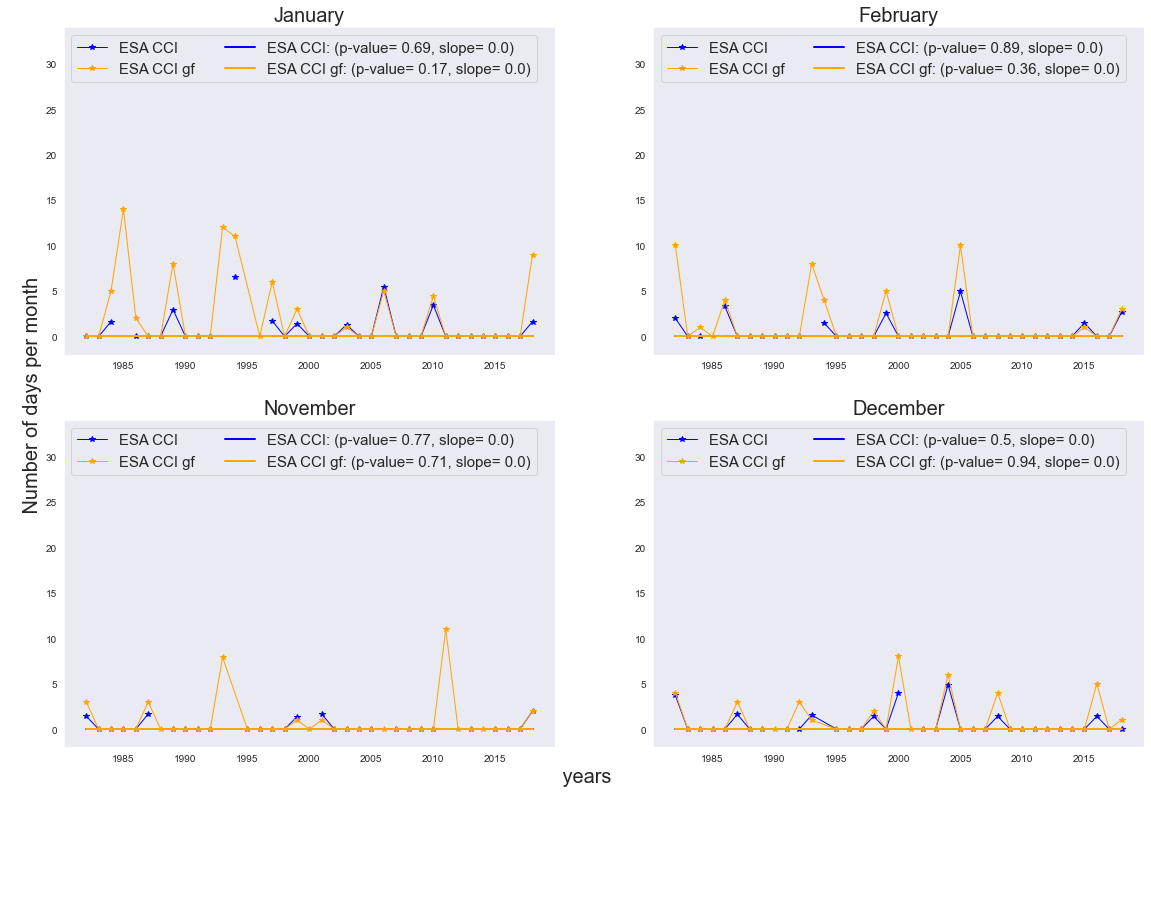

In [224]:
labels_months = ["January", "February", "November", "December"]

fig, axs=plt.subplots(2,2) 

# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=0.2,hspace=0.2)

# We fix the size of figure
set_size(15,10)

mons=[1,2,11,12]
years = [int(y) for y in range(1982,2019)]
index = 0
for i in range(2):
    for j in range(2):
        slope = mk.original_test(MID_scfg_Sdays[mons[index]]).slope
        slope_gf = mk.original_test(MID_scfg_interp_Sdays[mons[index]]).slope
    
        p = mk.original_test(MID_scfg_Sdays[mons[index]]).p
        p_gf = mk.original_test(MID_scfg_interp_Sdays[mons[index]]).p

        interc = mk.original_test(MID_scfg_Sdays[mons[index]]).intercept
        interc_gf = mk.original_test(MID_scfg_interp_Sdays[mons[index]]).intercept

        droit = [slope*k+ interc for k in range(37)]
        droit_gf = [slope_gf*k+ interc_gf for k in range(37)]
        
        droit = pd.DataFrame({'year': years, 'N': droit})
        droit = droit.set_index('year')
    
        droit_gf = pd.DataFrame({'year': years, 'N': droit_gf})
        droit_gf = droit_gf.set_index('year')
    
        labels_legend = ["ESA CCI" ,"ESA CCI gf",
                         "ESA CCI: (p-value= "+str(np.around(p,decimals=2))+", slope= "+str(np.around(slope, decimals=2))+")",
                         "ESA CCI gf: (p-value= "+str(np.around(p_gf, decimals=2))+", slope= "+str(np.around(slope_gf, decimals=2))+")"]
    
    
        MID_scfg_Sdays[mons[index]].plot(ax=axs[i][j], color=c1,  linewidth=1, marker='*')
        MID_scfg_interp_Sdays[mons[index]].plot(ax=axs[i][j], color=c2, marker='*', linewidth=1)
        
        droit.plot(ax=axs[i][j], ylim=[-2,34], color=c1,  linewidth=2)
        droit_gf.plot(ax=axs[i][j], ylim=[-2,34], color=c2,  linewidth=2)
    
        axs[i][j].set_title(labels_months[index], fontsize=20)
        axs[i][j].set_xlabel("")
        axs[i][j].legend(labels = labels_legend, loc='upper left', ncol=2, fontsize=15)
        axs[i][j].set_ylabel("") 
        axs[i][j].set_ylim(-2,34)
        
        index = index + 1
        
axs[1][0].set_xlabel("                                                                                                     years", fontsize=20)
axs[1][0].set_ylabel("                                                                     Number of days per month", fontsize=20)
        
#plt.savefig('MID_comparison_trend.png')  

<h1 style="font-size:1.5rem; color:green;"> Tichki </h1>

Text(0, 0.5, '                                                                     Number of days per month')

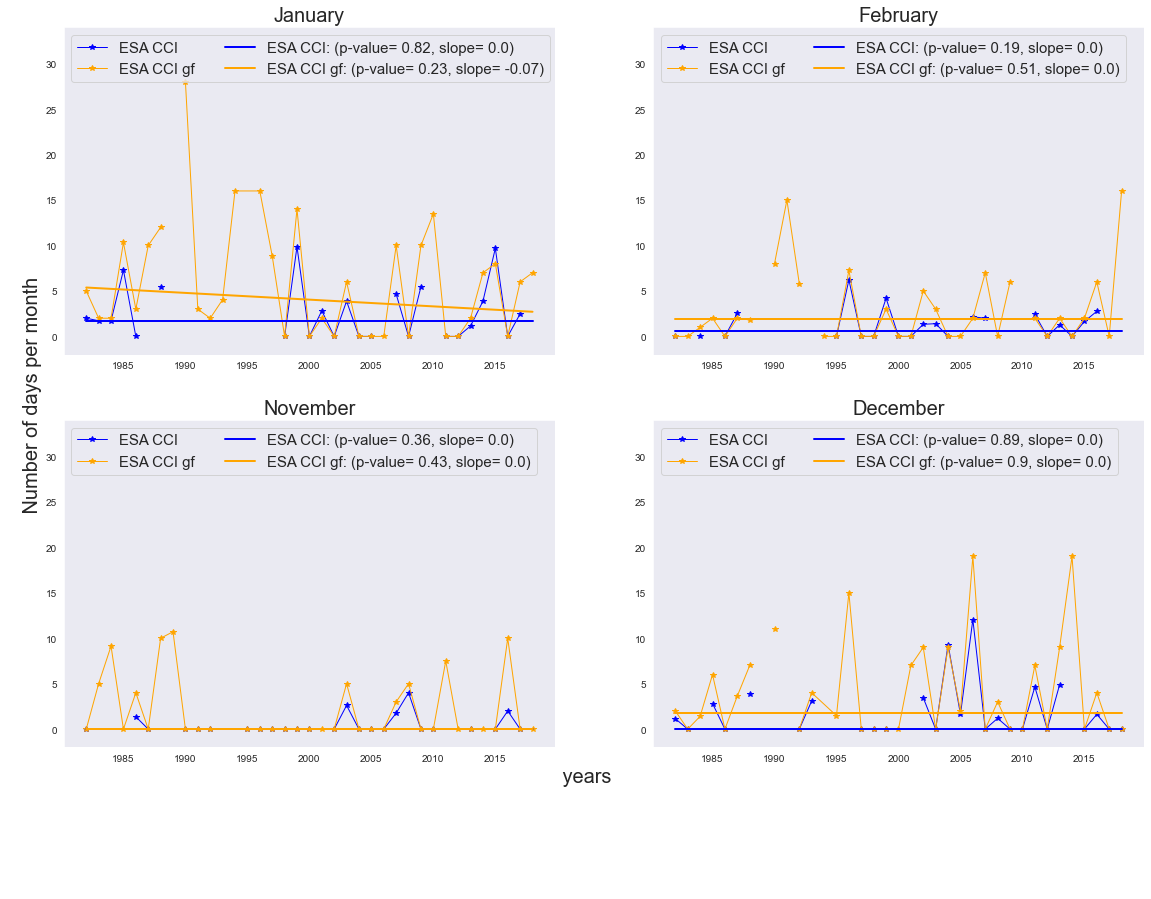

In [225]:
labels_months = ["January", "February", "November", "December"]

fig, axs=plt.subplots(2,2) 

# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=0.2,hspace=0.2)

# We fix the size of figure
set_size(15,10)

mons=[1,2,11,12]
years = [int(y) for y in range(1982,2019)]
index = 0
for i in range(2):
    for j in range(2):
        slope = mk.original_test(TIC_scfg_Sdays[mons[index]]).slope
        slope_gf = mk.original_test(TIC_scfg_interp_Sdays[mons[index]]).slope
    
        p = mk.original_test(TIC_scfg_Sdays[mons[index]]).p
        p_gf = mk.original_test(TIC_scfg_interp_Sdays[mons[index]]).p

        interc = mk.original_test(TIC_scfg_Sdays[mons[index]]).intercept
        interc_gf = mk.original_test(TIC_scfg_interp_Sdays[mons[index]]).intercept

        droit = [slope*k+ interc for k in range(37)]
        droit_gf = [slope_gf*k+ interc_gf for k in range(37)]
        
        droit = pd.DataFrame({'year': years, 'N': droit})
        droit = droit.set_index('year')
    
        droit_gf = pd.DataFrame({'year': years, 'N': droit_gf})
        droit_gf = droit_gf.set_index('year')
    
        labels_legend = ["ESA CCI" ,"ESA CCI gf",
                         "ESA CCI: (p-value= "+str(np.around(p,decimals=2))+", slope= "+str(np.around(slope, decimals=2))+")",
                         "ESA CCI gf: (p-value= "+str(np.around(p_gf, decimals=2))+", slope= "+str(np.around(slope_gf, decimals=2))+")"]
    
    
        TIC_scfg_Sdays[mons[index]].plot(ax=axs[i][j], color=c1,  linewidth=1, marker='*')
        TIC_scfg_interp_Sdays[mons[index]].plot(ax=axs[i][j], color=c2, marker='*', linewidth=1)
        
        droit.plot(ax=axs[i][j], ylim=[-2,34], color=c1,  linewidth=2)
        droit_gf.plot(ax=axs[i][j], ylim=[-2,34], color=c2,  linewidth=2)
    
        axs[i][j].set_title(labels_months[index], fontsize=20)
        axs[i][j].set_xlabel("")
        axs[i][j].legend(labels = labels_legend, loc='upper left', ncol=2, fontsize=15)
        axs[i][j].set_ylabel("") 
        axs[i][j].set_ylim(-2,34)
        
        index = index + 1

axs[1][0].set_xlabel("                                                                                                     years", fontsize=20)
axs[1][0].set_ylabel("                                                                     Number of days per month", fontsize=20)

#plt.savefig('TIC_comparison_trend.png')  

<h1 style="font-size:1.5rem; color:green;"> M'goun </h1>

Text(0, 0.5, '                                                                     Number of days per month')

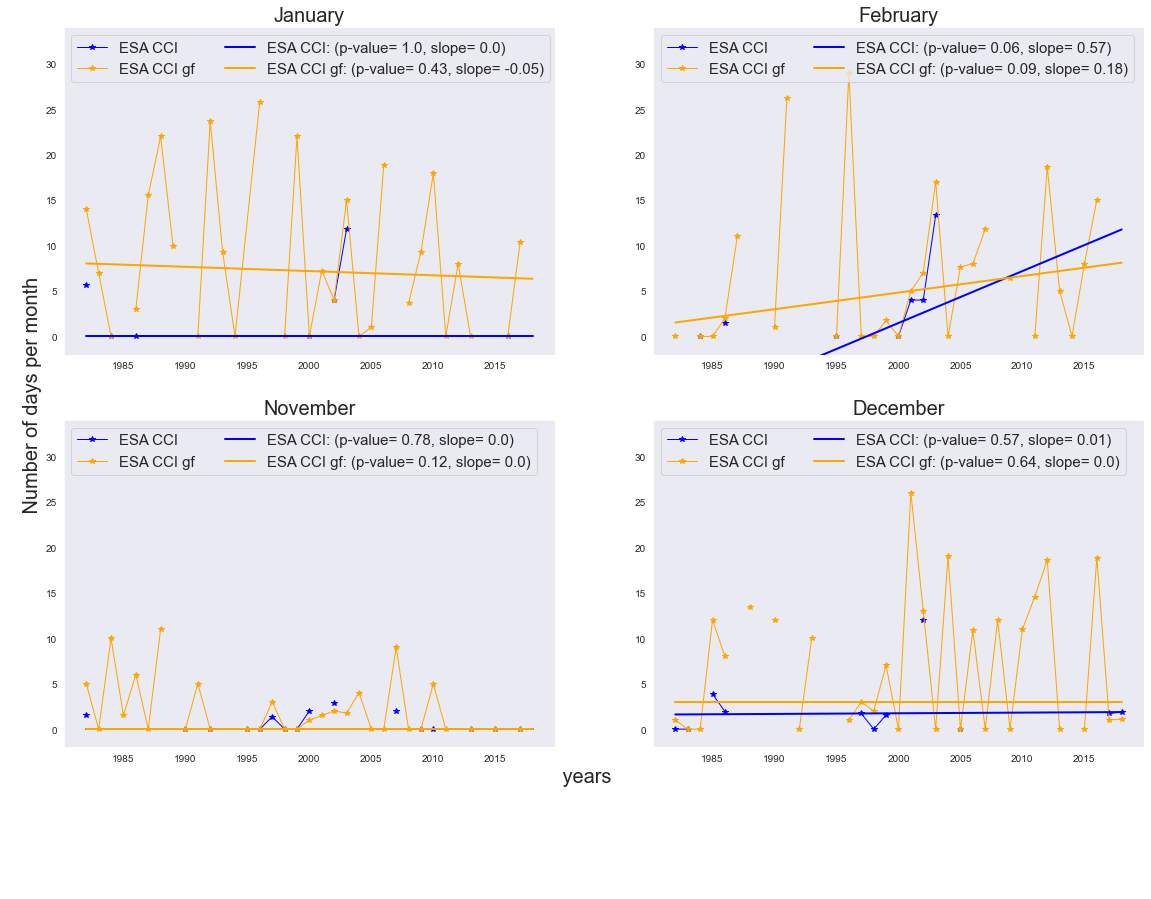

In [227]:
labels_months = ["January", "February", "November", "December"]

fig, axs=plt.subplots(2,2) 

# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=0.2,hspace=0.2)

# We fix the size of figure
set_size(15,10)

mons=[1,2,11,12]
years = [int(y) for y in range(1982,2019)]
index = 0
for i in range(2):
    for j in range(2):
        slope = mk.original_test(MGN_scfg_Sdays[mons[index]]).slope
        slope_gf = mk.original_test(MGN_scfg_interp_Sdays[mons[index]]).slope
    
        p = mk.original_test(MGN_scfg_Sdays[mons[index]]).p
        p_gf = mk.original_test(MGN_scfg_interp_Sdays[mons[index]]).p

        interc = mk.original_test(MGN_scfg_Sdays[mons[index]]).intercept
        interc_gf = mk.original_test(MGN_scfg_interp_Sdays[mons[index]]).intercept

        droit = [slope*k+ interc for k in range(37)]
        droit_gf = [slope_gf*k+ interc_gf for k in range(37)]
        
        droit = pd.DataFrame({'year': years, 'N': droit})
        droit = droit.set_index('year')
    
        droit_gf = pd.DataFrame({'year': years, 'N': droit_gf})
        droit_gf = droit_gf.set_index('year')
    
        labels_legend = ["ESA CCI" ,"ESA CCI gf",
                         "ESA CCI: (p-value= "+str(np.around(p,decimals=2))+", slope= "+str(np.around(slope, decimals=2))+")",
                         "ESA CCI gf: (p-value= "+str(np.around(p_gf, decimals=2))+", slope= "+str(np.around(slope_gf, decimals=2))+")"]
    
    
        MGN_scfg_Sdays[mons[index]].plot(ax=axs[i][j], color=c1,  linewidth=1, marker='*')
        MGN_scfg_interp_Sdays[mons[index]].plot(ax=axs[i][j], color=c2, marker='*', linewidth=1)
        
        droit.plot(ax=axs[i][j], ylim=[-2,34], color=c1,  linewidth=2)
        droit_gf.plot(ax=axs[i][j], ylim=[-2,34], color=c2,  linewidth=2)
    
        axs[i][j].set_title(labels_months[index], fontsize=20)
        axs[i][j].set_xlabel("")
        axs[i][j].legend(labels = labels_legend, loc='upper left', ncol=2, fontsize=15)
        axs[i][j].set_ylabel("") 
        axs[i][j].set_ylim(-2,34)
        
        index = index + 1

axs[1][0].set_xlabel("                                                                                                     years", fontsize=20)
axs[1][0].set_ylabel("                                                                     Number of days per month", fontsize=20)

#plt.savefig('MGN_comparison_trend.png') 

<h1 style="font-size:1.5rem; color:green;"> Tizi Touzna </h1>

Text(0, 0.5, '                                                                     Number of days per month')

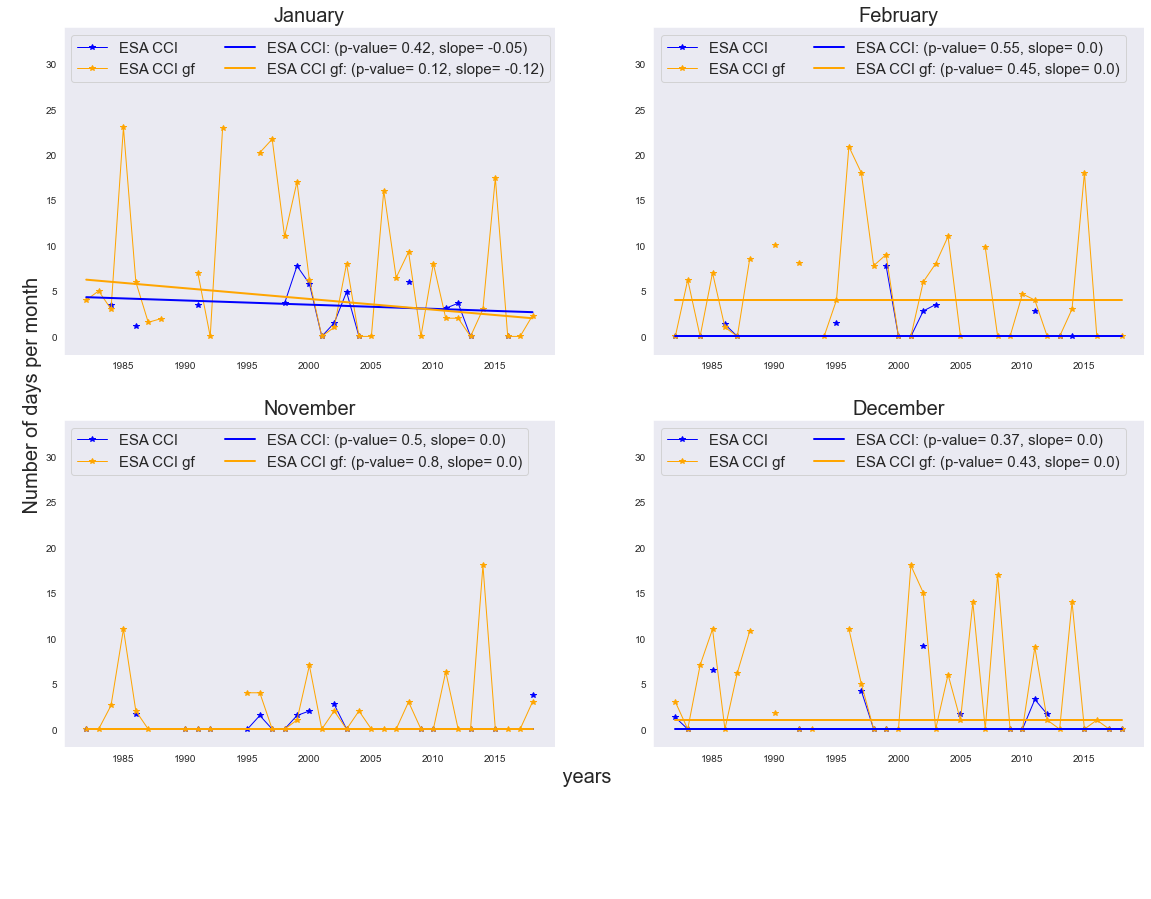

In [228]:
labels_months = ["January", "February", "November", "December"]

fig, axs=plt.subplots(2,2) 

# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=0.2,hspace=0.2)

# We fix the size of figure
set_size(15,10)

mons=[1,2,11,12]
years = [int(y) for y in range(1982,2019)]
index = 0
for i in range(2):
    for j in range(2):
        slope = mk.original_test(TIZ_scfg_Sdays[mons[index]]).slope
        slope_gf = mk.original_test(TIZ_scfg_interp_Sdays[mons[index]]).slope
    
        p = mk.original_test(TIZ_scfg_Sdays[mons[index]]).p
        p_gf = mk.original_test(TIZ_scfg_interp_Sdays[mons[index]]).p

        interc = mk.original_test(TIZ_scfg_Sdays[mons[index]]).intercept
        interc_gf = mk.original_test(TIZ_scfg_interp_Sdays[mons[index]]).intercept

        droit = [slope*k+ interc for k in range(37)]
        droit_gf = [slope_gf*k+ interc_gf for k in range(37)]
        
        droit = pd.DataFrame({'year': years, 'N': droit})
        droit = droit.set_index('year')
    
        droit_gf = pd.DataFrame({'year': years, 'N': droit_gf})
        droit_gf = droit_gf.set_index('year')
    
        labels_legend = ["ESA CCI" ,"ESA CCI gf",
                         "ESA CCI: (p-value= "+str(np.around(p,decimals=2))+", slope= "+str(np.around(slope, decimals=2))+")",
                         "ESA CCI gf: (p-value= "+str(np.around(p_gf, decimals=2))+", slope= "+str(np.around(slope_gf, decimals=2))+")"]
    
    
        TIZ_scfg_Sdays[mons[index]].plot(ax=axs[i][j], color=c1,  linewidth=1, marker='*')
        TIZ_scfg_interp_Sdays[mons[index]].plot(ax=axs[i][j], color=c2, marker='*', linewidth=1)
        
        droit.plot(ax=axs[i][j], ylim=[-2,34], color=c1,  linewidth=2)
        droit_gf.plot(ax=axs[i][j], ylim=[-2,34], color=c2,  linewidth=2)
    
        axs[i][j].set_title(labels_months[index], fontsize=20)
        axs[i][j].set_xlabel("")
        axs[i][j].legend(labels = labels_legend, loc='upper left', ncol=2, fontsize=15)
        axs[i][j].set_ylabel("") 
        axs[i][j].set_ylim(-2,34)
        
        index = index + 1

axs[1][0].set_xlabel("                                                                                                     years", fontsize=20)
axs[1][0].set_ylabel("                                                                     Number of days per month", fontsize=20)

# plt.savefig('TIZ_comparison_trend.png') 

<h1 style="font-size:1.5rem; color:green;"> Oukaimeden </h1>

Text(0, 0.5, '                                                                     Number of days per month')

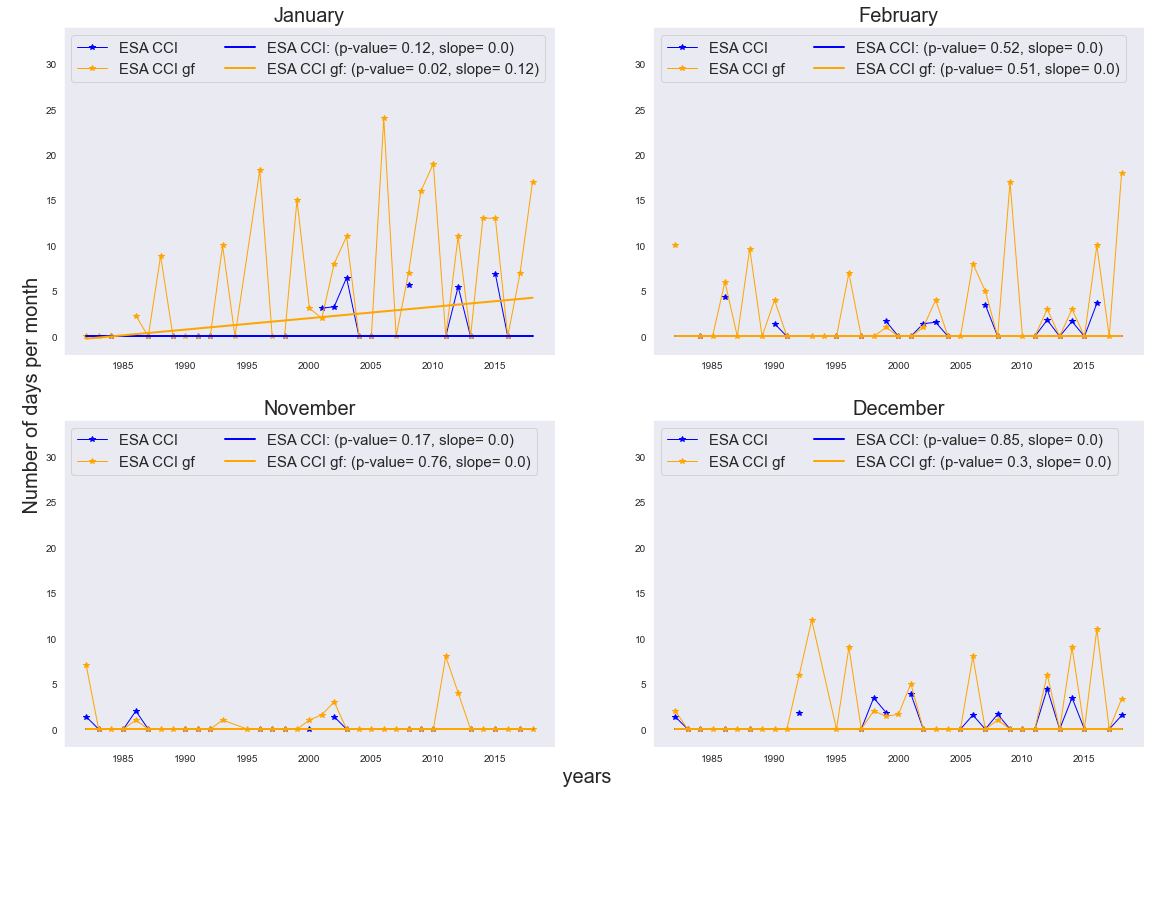

In [229]:
labels_months = ["January", "February", "November", "December"]

fig, axs=plt.subplots(2,2) 

# We fix the spaces between the subfigures
plt.subplots_adjust(wspace=0.2,hspace=0.2)

# We fix the size of figure
set_size(15,10)

mons=[1,2,11,12]
years = [int(y) for y in range(1982,2019)]
index = 0
for i in range(2):
    for j in range(2):
        slope = mk.original_test(OUK_scfg_Sdays[mons[index]]).slope
        slope_gf = mk.original_test(OUK_scfg_interp_Sdays[mons[index]]).slope
    
        p = mk.original_test(OUK_scfg_Sdays[mons[index]]).p
        p_gf = mk.original_test(OUK_scfg_interp_Sdays[mons[index]]).p

        interc = mk.original_test(OUK_scfg_Sdays[mons[index]]).intercept
        interc_gf = mk.original_test(OUK_scfg_interp_Sdays[mons[index]]).intercept

        droit = [slope*k+ interc for k in range(37)]
        droit_gf = [slope_gf*k+ interc_gf for k in range(37)]
        
        droit = pd.DataFrame({'year': years, 'N': droit})
        droit = droit.set_index('year')
    
        droit_gf = pd.DataFrame({'year': years, 'N': droit_gf})
        droit_gf = droit_gf.set_index('year')
    
        labels_legend = ["ESA CCI" ,"ESA CCI gf",
                         "ESA CCI: (p-value= "+str(np.around(p,decimals=2))+", slope= "+str(np.around(slope, decimals=2))+")",
                         "ESA CCI gf: (p-value= "+str(np.around(p_gf, decimals=2))+", slope= "+str(np.around(slope_gf, decimals=2))+")"]
    
    
        OUK_scfg_Sdays[mons[index]].plot(ax=axs[i][j], color=c1,  linewidth=1, marker='*')
        OUK_scfg_interp_Sdays[mons[index]].plot(ax=axs[i][j], color=c2, marker='*', linewidth=1)
        
        droit.plot(ax=axs[i][j], ylim=[-2,34], color=c1,  linewidth=2)
        droit_gf.plot(ax=axs[i][j], ylim=[-2,34], color=c2,  linewidth=2)
    
        axs[i][j].set_title(labels_months[index], fontsize=20)
        axs[i][j].set_xlabel("")
        axs[i][j].legend(labels = labels_legend, loc='upper left', ncol=2, fontsize=15)
        axs[i][j].set_ylabel("") 
        axs[i][j].set_ylim(-2,34)
        
        index = index + 1

axs[1][0].set_xlabel("                                                                                                     years", fontsize=20)
axs[1][0].set_ylabel("                                                                     Number of days per month", fontsize=20)

# plt.savefig('OUK_comparison_trend.png') 